<a href="https://colab.research.google.com/github/Shifath472533/All-Image-captioning-models-and-links-for-data-sets-in-Bangla/blob/master/ResNet_Bangla_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Mounting <b>google drive</b></h3>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Setting up <b>dependencies</b></h3>

In [0]:
!pip install --upgrade pip
!pip install pycocotools
!pip install git+https://github.com/salaniz/pycocoevalcap          #this is for pycocoevalcap library to calulate metrics
!pip install git+https://github.com/Maluuba/nlg-eval.git@master    #this is for nlgeval library to calulate metrics
!nlg-eval --setup

     |████████████████████████████████| 1.4MB 3.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Cloning https://github.com/salaniz/pycocoevalcap to /tmp/pip-req-build-dtkqbws6
  Running command git clone -q https://github.com/salaniz/pycocoevalcap /tmp/pip-req-build-dtkqbws6
  Created wheel for pycocoevalcap: filename=pycocoevalcap-1.1-py3-none-any.whl size=104310172 sha256=71db90ebcca1c599d42478c974f032e644fb12ade5726afdd5984346d41e6bf4
  Stored in directory: /tmp/pip-ephem-wheel-cache-97nd5thx/wheels/df/74/69/758b2491ca93bf681a1509671df34df9cf5ff605edf6e112ed
Successfully built pycocoevalcap
  Cloning https://github.com/Maluuba/nlg-eval.git (to revision master) to /tmp/pip-req-build-f_e9sr6_
  Running command git clone -q https://github.com/Maluuba/nlg-eval.git /tmp/pip-req-build-f_e9sr6_
     |████████████████████████████████| 449 kB 3.6 MB/s 
  Created wheel for nlg-eval: filename=nlg_eval-2.3-py3-none-any.wh

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing <b>Libraries</b></h3>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from numpy import array
import pickle
import numpy as np
import os
import cv2

Using TensorFlow backend.


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing Libraries for <b>pycocoevalcap</b></h3>

In [0]:
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing Libraries for <b>nlgeval</b></h3>

In [0]:
from __future__ import unicode_literals
import os
import unittest
import nlgeval
from nlgeval import NLGEval

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Loading **image directory** and counting the <b>No. of images</b></h3>

In [0]:
cap_per_img = {}
defected_cap = {}

In [0]:
cnt_img = 0
#image directory
img_dir = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Chittron dataset/images"

for filename in os.listdir(img_dir):
  cap_per_img[filename] = []
  defected_cap[filename] = []
  cnt_img+=1
    
print("Number of images : " , cnt_img)
print("Number of captions should be : " , cnt_img*2)

Number of images :  9154
Number of captions should be :  18308


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Checking If captions are defected and print if it is with Image names</h3>

In [0]:
token_dir = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Chittron dataset/token.txt"

cnt_cap = 0

with open (token_dir, "r",encoding="utf-16") as fileHandler:
  for line in fileHandler:
    sentence = line.strip()
    sentences = sentence.split("\t")
    ans = sentences[0]
    ans1 = ans.split("#")
    # print(ans1[0] , " : ",ans1[1])
    if ans1[0]=='\ufeff01.png':
      # ans1[0] = '01.png'
      continue
    if ans1[0] in cap_per_img:
      cap_per_img[ans1[0]].append(ans1[1])
      cnt_cap+=1
    else:
      defected_cap[ans1[0]].append(ans1[1])

# print(cnt_cap)

if(cnt_img*2 == cnt_cap):
  print("All captions are okay.")
elif(len(defected_cap) > 0):
  print("Defected captions : ")
  for img_nm in defected_cap:
    print("Image Name : ",img_nm,"  Number : ",defected_cap[img_nm])          


All captions are okay.


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Loading the directories of **token.csv** , **train.txt** , **test.txt** and **validation.txt** files and converting them to pandas &nbsp;&nbsp;dataframe</h3>

In [0]:
image_tokens=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Chittron dataset/token.txt",encoding = 'utf-16', sep='\t',names=["img_id","img_caption"])
train_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Chittron dataset/TrainImages.txt.txt",encoding = 'utf-16',names=["img_id"])
test_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Chittron dataset/TestImages.txt.txt",encoding = 'utf-16',names=["img_id"])
val_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Chittron dataset/ValidationImages.txt.txt",encoding = 'utf-16',names=["img_id"])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b></h3>

In [0]:
image_tokens.head(5) 

,img_id,img_caption
0,01.png#0,দুই জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর এক ...
1,01.png#1,একটি হলুদ জামা পায়জামা পরা মহিলা দাড়িয়ে হাতে এ...
2,02.png#0,জলাশয় এ একজন ছেলে মানুষ ও একটি বাচ্চা মানুষ আছ...
3,02.png#1,২ জন মানুষ যার একজন পুরুষ একটি নৌকায় দাড়িয়ে চা...
4,03.png#0,অনেক মেয়ে মানুষ বসে আছে।


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>train image names</b></h3>

In [0]:
train_image_names.head(5)

,img_id
0,01.png
1,02.png
2,03.png
3,04.png
4,05.png


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing one of the <b>train images</b></h3>

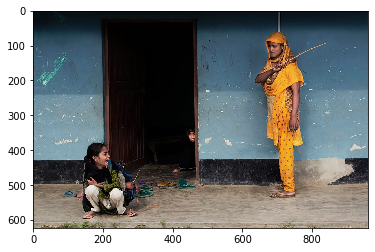

In [0]:
img=cv2.imread(img_dir+ "/" +train_image_names.img_id[0])
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Removing the #0 , #1 from the <b>image ids</b></h3>

In [0]:
image_tokens["img_id"]=image_tokens["img_id"].map(lambda x: x[:len(x)-2])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b> again</h3>

In [0]:
image_tokens.head(5)

,img_id,img_caption
0,01.png,দুই জন মেয়ে মানুষ আছে। এক জন দাড়িয়ে আছে আর এক ...
1,01.png,একটি হলুদ জামা পায়জামা পরা মহিলা দাড়িয়ে হাতে এ...
2,02.png,জলাশয় এ একজন ছেলে মানুষ ও একটি বাচ্চা মানুষ আছ...
3,02.png,২ জন মানুষ যার একজন পুরুষ একটি নৌকায় দাড়িয়ে চা...
4,03.png,অনেক মেয়ে মানুষ বসে আছে।


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **train dictionary** having key as the image id and value as a list of its captions</h3>

In [0]:
train_captions={}
for i in tqdm(range(len(train_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==train_image_names["img_id"].iloc[i]].img_caption)]
  train_captions[train_image_names["img_id"].iloc[i]]=l

100%|██████████| 7154/7154 [00:13<00:00, 516.83it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **test dictionary** having key as the image id and value as a list of its captions</h3>

In [0]:
test_captions={}
for i in tqdm(range(len(test_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==test_image_names["img_id"].iloc[i]].img_caption)]
  test_captions[test_image_names["img_id"].iloc[i]]=l

100%|██████████| 1000/1000 [00:02<00:00, 465.89it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **validation dictionary** having key as the image id and value as a list of its captions</h3>

In [0]:
validation_captions={}
for i in tqdm(range(len(val_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==val_image_names["img_id"].iloc[i]].img_caption)]
  validation_captions[val_image_names["img_id"].iloc[i]]=l

100%|██████████| 1000/1000 [00:01<00:00, 520.88it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing the **ResNet50** model and printing the <b>summary</b></h3>

In [0]:
model=ResNet50(include_top=False, weights='imagenet',pooling='avg',input_shape=(224,224,3))
model.summary()













94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining the path to save the <b>pickle file</b></h3>

In [0]:
pickle_path = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Chittron dataset/"

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict **train_features** and encoding as a <b>pkl</b> &nbsp;&nbsp;file</h3>

In [0]:
path=img_dir+"/"
train_features={}
c=0
for image_name in tqdm(train_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  train_features[image_name]=features.squeeze()

In [0]:
print("After Extracting Features length of train_features : ")
print(len(train_features))

In [0]:
with open( pickle_path+"train_encoded_images.pkl", "wb" ) as pickle_f:
    pickle.dump(train_features, pickle_f )

In [0]:
train_features = {}
pickle_in = open(pickle_path + "train_encoded_images.pkl","rb")
train_features = pickle.load(pickle_in)

In [0]:
print("After Extracting from pkl file length of train_features : ")
print(len(train_features))

After Extracting from pkl file length of train_features : 
7154


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict <b>test_features</b> and encoding as a <b>pkl</b> &nbsp;&nbsp;file</h3>

In [0]:
path=img_dir+"/"
test_features={}
c=0
for image_name in tqdm(test_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  test_features[image_name]=features.squeeze()

In [0]:
with open( pickle_path+"test_encoded_images.pkl", "wb" ) as pickle_f1:
    pickle.dump(test_features, pickle_f1 )

In [0]:
test_features = {}
pickle_in = open(pickle_path + "test_encoded_images.pkl","rb")
test_features = pickle.load(pickle_in)

In [0]:
print("After Extracting from pkl file length of test_features : ")
print(len(test_features))

After Extracting from pkl file length of test_features : 
1000


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict <b>validation_features</b> and encoding as a <b>&nbsp;&nbsp;pkl</b> file</h3>

In [0]:
path=img_dir+"/"
validation_features={}
c=0
for image_name in tqdm(validation_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  validation_features[image_name]=features.squeeze()

In [0]:
with open( pickle_path+"validation_encoded_images.pkl", "wb" ) as pickle_f2:
    pickle.dump(validation_features, pickle_f2 )

In [0]:
validation_features = {}
pickle_in = open(pickle_path + "validation_encoded_images.pkl","rb")
validation_features = pickle.load(pickle_in)

In [0]:
print("After Extracting from pkl file length of validation_features : ")
print(len(validation_features))

After Extracting from pkl file length of validation_features : 
1000


In [0]:
all_captions=[]
for img_id in tqdm(train_captions):
  for captions in train_captions[img_id]:
    all_captions.append(captions)

all_words=" ".join(all_captions)
print()
print(len(all_words))
unique_words=list(set(all_words.strip().split(" ")))
print(len(unique_words))

100%|██████████| 7154/7154 [00:00<00:00, 372292.75it/s]


674065
5456


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining **max_length** and **vocabulary size**</h3>

In [0]:
vocab_size=len(unique_words)+1
max_length=40

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Forming dictionaries containing mapping of **words to indices** and <b>indices to words</b></h3>

In [0]:
words_to_indices={val:index+1 for index, val in enumerate(unique_words)}
indices_to_words = { index+1:val for index, val in enumerate(unique_words)}
words_to_indices["Unk"]=0
indices_to_words[0]="Unk"

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Forming dictionary having <b>encoded captions</b></h3>

In [0]:
train_encoded_captions={}
for img_id in tqdm(train_captions):
  train_encoded_captions[img_id]=[]
  for i in range(2):
    print(img_id)
    train_encoded_captions[img_id].append([words_to_indices[s] for s in train_captions[img_id][i].split(" ")])

  4%|▍         | 314/7154 [00:00<00:02, 3136.36it/s]

01.png
01.png
02.png
02.png
03.png
03.png
04.png
04.png
05.png
05.png
06.png
06.png
07.png
07.png
08.png
08.png
09.png
09.png
10.png
10.png
11.png
11.png
12.png
12.png
13.png
13.png
14.png
14.png
15.png
15.png
16.png
16.png
17.png
17.png
18.png
18.png
19.png
19.png
20.png
20.png
21.png
21.png
22.png
22.png
23.png
23.png
24.png
24.png
25.png
25.png
26.png
26.png
27.png
27.png
28.png
28.png
29.png
29.png
30.png
30.png
31.png
31.png
32.png
32.png
33.png
33.png
34.png
34.png
35.png
35.png
36.png
36.png
37.png
37.png
38.png
38.png
39.png
39.png
40.png
40.png
41.png
41.png
42.png
42.png
43.png
43.png
44.png
44.png
45.png
45.png
46.png
46.png
47.png
47.png
48.png
48.png
49.png
49.png
50.png
50.png
51.png
51.png
52.png
52.png
53.png
53.png
54.png
54.png
55.png
55.png
56.png
56.png
57.png
57.png
58.png
58.png
59.png
59.png
60.png
60.png
61.png
61.png
62.png
62.png
63.png
63.png
64.png
64.png
65.png
65.png
66.png
66.png
67.png
67.png
68.png
68.png
69.png
69.png
70.png
70.png
71.png
71.png
72.png

 18%|█▊        | 1259/7154 [00:00<00:01, 3140.49it/s]

633.png
633.png
634.png
634.png
635.png
635.png
636.png
636.png
637.png
637.png
638.png
638.png
639.png
639.png
640.png
640.png
641.png
641.png
642.png
642.png
643.png
643.png
644.png
644.png
645.png
645.png
646.png
646.png
647.png
647.png
648.png
648.png
649.png
649.png
650.png
650.png
651.png
651.png
652.png
652.png
653.png
653.png
654.png
654.png
655.png
655.png
656.png
656.png
657.png
657.png
658.png
658.png
659.png
659.png
660.png
660.png
661.png
661.png
662.png
662.png
663.png
663.png
664.png
664.png
665.png
665.png
666.png
666.png
667.png
667.png
668.png
668.png
669.png
669.png
670.png
670.png
671.png
671.png
672.png
672.png
673.png
673.png
674.png
674.png
675.png
675.png
676.png
676.png
677.png
677.png
678.png
678.png
679.png
679.png
680.png
680.png
681.png
681.png
682.png
682.png
683.png
683.png
684.png
684.png
685.png
685.png
686.png
686.png
687.png
687.png
688.png
688.png
689.png
689.png
690.png
690.png
691.png
691.png
692.png
692.png
693.png
693.png
694.png
694.png
695.png


 26%|██▋       | 1895/7154 [00:00<00:01, 3150.98it/s]


1287.png
1287.png
1288.png
1288.png
1289.png
1289.png
1290.png
1290.png
1291.png
1291.png
1292.png
1292.png
1293.png
1293.png
1294.png
1294.png
1295.png
1295.png
1296.png
1296.png
1297.png
1297.png
1298.png
1298.png
1299.png
1299.png
1300.png
1300.png
1301.png
1301.png
1302.png
1302.png
1303.png
1303.png
1304.png
1304.png
1305.png
1305.png
1306.png
1306.png
1307.png
1307.png
1308.png
1308.png
1309.png
1309.png
1310.png
1310.png
1311.png
1311.png
1312.png
1312.png
1313.png
1313.png
1314.png
1314.png
1315.png
1315.png
1316.png
1316.png
1317.png
1317.png
1318.png
1318.png
1319.png
1319.png
1320.png
1320.png
1321.png
1321.png
1322.png
1322.png
1323.png
1323.png
1324.png
1324.png
1325.png
1325.png
1326.png
1326.png
1327.png
1327.png
1328.png
1328.png
1329.png
1329.png
1330.png
1330.png
1331.png
1331.png
1332.png
1332.png
1333.png
1333.png
1334.png
1334.png
1335.png
1335.png
1336.png
1336.png
1337.png
1337.png
1338.png
1338.png
1339.png
1339.png
1340.png
1340.png
1341.png
1341.png
1342.png


 36%|███▋      | 2600/7154 [00:00<00:01, 3330.78it/s]


1985.png
1986.png
1986.png
1987.png
1987.png
1988.png
1988.png
1989.png
1989.png
1990.png
1990.png
1991.png
1991.png
1992.png
1992.png
1993.png
1993.png
1994.png
1994.png
1995.png
1995.png
1996.png
1996.png
1997.png
1997.png
1998.png
1998.png
1999.png
1999.png
2000.png
2000.png
2001.png
2001.png
2002.png
2002.png
2003.png
2003.png
2004.png
2004.png
2005.png
2005.png
2006.png
2006.png
2007.png
2007.png
2008.png
2008.png
2009.png
2009.png
2010.png
2010.png
2011.png
2011.png
2012.png
2012.png
2013.png
2013.png
2014.png
2014.png
2015.png
2015.png
2016.png
2016.png
2017.png
2017.png
2018.png
2018.png
2019.png
2019.png
2020.png
2020.png
2021.png
2021.png
2022.png
2022.png
2023.png
2023.png
2024.png
2024.png
2025.png
2025.png
2026.png
2026.png
2027.png
2027.png
2028.png
2028.png
2029.png
2029.png
2030.png
2030.png
2031.png
2031.png
2032.png
2032.png
2033.png
2033.png
2034.png
2034.png
2035.png
2035.png
2036.png
2036.png
2037.png
2037.png
2038.png
2038.png
2039.png
2039.png
2040.png
2040.png


 45%|████▌     | 3225/7154 [00:01<00:01, 3132.62it/s]

2705.png
2706.png
2706.png
2707.png
2707.png
2708.png
2708.png
2709.png
2709.png
2710.png
2710.png
2711.png
2711.png
2712.png
2712.png
2713.png
2713.png
2714.png
2714.png
2715.png
2715.png
2716.png
2716.png
2717.png
2717.png
2718.png
2718.png
2719.png
2719.png
2720.png
2720.png
2721.png
2721.png
2722.png
2722.png
2723.png
2723.png
2724.png
2724.png
2725.png
2725.png
2726.png
2726.png
2727.png
2727.png
2728.png
2728.png
2729.png
2729.png
2730.png
2730.png
2731.png
2731.png
2732.png
2732.png
2733.png
2733.png
2734.png
2734.png
2735.png
2735.png
2736.png
2736.png
2737.png
2737.png
2738.png
2738.png
2739.png
2739.png
2740.png
2740.png
2741.png
2741.png
2742.png
2742.png
2743.png
2743.png
2744.png
2744.png
2745.png
2745.png
2746.png
2746.png
2747.png
2747.png
2748.png
2748.png
2749.png
2749.png
2750.png
2750.png
2751.png
2751.png
2752.png
2752.png
2753.png
2753.png
2754.png
2754.png
2755.png
2755.png
2756.png
2756.png
2757.png
2757.png
2758.png
2758.png
2759.png
2759.png
2760.png
2760.png
2

 54%|█████▍    | 3857/7154 [00:01<00:01, 3141.51it/s]


3340.png
3340.png
3341.png
3341.png
3342.png
3342.png
3343.png
3343.png
3344.png
3344.png
3345.png
3345.png
3346.png
3346.png
3347.png
3347.png
3348.png
3348.png
3349.png
3349.png
3350.png
3350.png
3351.png
3351.png
3352.png
3352.png
3353.png
3353.png
3354.png
3354.png
3355.png
3355.png
3356.png
3356.png
3357.png
3357.png
3358.png
3358.png
3359.png
3359.png
3360.png
3360.png
3361.png
3361.png
3362.png
3362.png
3363.png
3363.png
3364.png
3364.png
3365.png
3365.png
3366.png
3366.png
3367.png
3367.png
3368.png
3368.png
3369.png
3369.png
3370.png
3370.png
3371.png
3371.png
3372.png
3372.png
3373.png
3373.png
3374.png
3374.png
3375.png
3375.png
3376.png
3376.png
3377.png
3377.png
3378.png
3378.png
3379.png
3379.png
3380.png
3380.png
3381.png
3381.png
3382.png
3382.png
3383.png
3383.png
3384.png
3384.png
3385.png
3385.png
3386.png
3386.png
3387.png
3387.png
3388.png
3388.png
3389.png
3389.png
3390.png
3390.png
3391.png
3391.png
3392.png
3392.png
3393.png
3393.png
3394.png
3394.png
3395.png


 63%|██████▎   | 4491/7154 [00:01<00:00, 3134.06it/s]


3968.png
3968.png
3969.png
3969.png
3970.png
3970.png
3971.png
3971.png
3972.png
3972.png
3973.png
3973.png
3974.png
3974.png
3975.png
3975.png
3976.png
3976.png
3977.png
3977.png
3978.png
3978.png
3979.png
3979.png
3980.png
3980.png
3981.png
3981.png
3982.png
3982.png
3983.png
3983.png
3984.png
3984.png
3985.png
3985.png
3986.png
3986.png
3987.png
3987.png
3988.png
3988.png
3989.png
3989.png
3990.png
3990.png
3991.png
3991.png
3992.png
3992.png
3993.png
3993.png
3994.png
3994.png
3995.png
3995.png
3996.png
3996.png
3997.png
3997.png
3998.png
3998.png
3999.png
3999.png
4000.png
4000.png
4001.png
4001.png
4002.png
4002.png
4003.png
4003.png
4004.png
4004.png
4005.png
4005.png
4006.png
4006.png
4007.png
4007.png
4008.png
4008.png
4009.png
4009.png
4010.png
4010.png
4011.png
4011.png
4012.png
4012.png
4013.png
4013.png
4014.png
4014.png
4015.png
4015.png
4016.png
4016.png
4017.png
4017.png
4018.png
4018.png
4019.png
4019.png
4020.png
4020.png
4021.png
4021.png
4022.png
4022.png
4023.png


 71%|███████▏  | 5115/7154 [00:01<00:00, 3088.82it/s]

4615.png
4616.png
4616.png
4617.png
4617.png
4618.png
4618.png
4619.png
4619.png
4620.png
4620.png
4621.png
4621.png
4622.png
4622.png
4623.png
4623.png
4624.png
4624.png
4625.png
4625.png
4626.png
4626.png
4627.png
4627.png
4628.png
4628.png
4629.png
4629.png
4630.png
4630.png
4631.png
4631.png
4632.png
4632.png
4633.png
4633.png
4634.png
4634.png
4635.png
4635.png
4636.png
4636.png
4637.png
4637.png
4638.png
4638.png
4639.png
4639.png
4640.png
4640.png
4641.png
4641.png
4642.png
4642.png
4643.png
4643.png
4644.png
4644.png
4645.png
4645.png
4646.png
4646.png
4647.png
4647.png
4648.png
4648.png
4649.png
4649.png
4650.png
4650.png
4651.png
4651.png
4652.png
4652.png
4653.png
4653.png
4654.png
4654.png
4655.png
4655.png
4656.png
4656.png
4657.png
4657.png
4658.png
4658.png
4659.png
4659.png
4660.png
4660.png
4661.png
4661.png
4662.png
4662.png
4663.png
4663.png
4664.png
4664.png
4665.png
4665.png
4666.png
4666.png
4667.png
4667.png
4668.png
4668.png
4669.png
4669.png
4670.png
4670.png
4

 80%|████████  | 5747/7154 [00:01<00:00, 3116.05it/s]


5262.png
5263.png
5263.png
5264.png
5264.png
5265.png
5265.png
5266.png
5266.png
5267.png
5267.png
5268.png
5268.png
5269.png
5269.png
5270.png
5270.png
5271.png
5271.png
5272.png
5272.png
5273.png
5273.png
5274.png
5274.png
5275.png
5275.png
5276.png
5276.png
5277.png
5277.png
5278.png
5278.png
5279.png
5279.png
5280.png
5280.png
5281.png
5281.png
5282.png
5282.png
5283.png
5283.png
5284.png
5284.png
5285.png
5285.png
5286.png
5286.png
5287.png
5287.png
5288.png
5288.png
5289.png
5289.png
5290.png
5290.png
5291.png
5291.png
5292.png
5292.png
5293.png
5293.png
5294.png
5294.png
5295.png
5295.png
5296.png
5296.png
5297.png
5297.png
5298.png
5298.png
5299.png
5299.png
5300.png
5300.png
5301.png
5301.png
5302.png
5302.png
5303.png
5303.png
5304.png
5304.png
5305.png
5305.png
5306.png
5306.png
5307.png
5307.png
5308.png
5308.png
5309.png
5309.png
5310.png
5310.png
5311.png
5311.png
5312.png
5312.png
5313.png
5313.png
5314.png
5314.png
5315.png
5315.png
5316.png
5316.png
5317.png
5317.png


 90%|████████▉ | 6404/7154 [00:02<00:00, 3199.57it/s]


5920.png
5921.png
5921.png
5922.png
5922.png
5923.png
5923.png
5924.png
5924.png
5925.png
5925.png
5926.png
5926.png
5927.png
5927.png
5928.png
5928.png
5929.png
5929.png
5930.png
5930.png
5931.png
5931.png
5932.png
5932.png
5933.png
5933.png
5934.png
5934.png
5935.png
5935.png
5936.png
5936.png
5937.png
5937.png
5938.png
5938.png
5939.png
5939.png
5940.png
5940.png
5941.png
5941.png
5942.png
5942.png
5943.png
5943.png
5944.png
5944.png
5945.png
5945.png
5946.png
5946.png
5947.png
5947.png
5948.png
5948.png
5949.png
5949.png
5950.png
5950.png
5951.png
5951.png
5952.png
5952.png
5953.png
5953.png
5954.png
5954.png
5955.png
5955.png
5956.png
5956.png
5957.png
5957.png
5958.png
5958.png
5959.png
5959.png
5960.png
5960.png
5961.png
5961.png
5962.png
5962.png
5963.png
5963.png
5964.png
5964.png
5965.png
5965.png
5966.png
5966.png
5967.png
5967.png
5968.png
5968.png
5969.png
5969.png
5970.png
5970.png
5971.png
5971.png
5972.png
5972.png
5973.png
5973.png
5974.png
5974.png
5975.png
5975.png


100%|██████████| 7154/7154 [00:02<00:00, 3159.23it/s]


6568.png
6568.png
6569.png
6569.png
6570.png
6570.png
6571.png
6571.png
6572.png
6572.png
6573.png
6573.png
6574.png
6574.png
6575.png
6575.png
6576.png
6576.png
6577.png
6577.png
6578.png
6578.png
6579.png
6579.png
6580.png
6580.png
6581.png
6581.png
6582.png
6582.png
6583.png
6583.png
6584.png
6584.png
6585.png
6585.png
6586.png
6586.png
6587.png
6587.png
6588.png
6588.png
6589.png
6589.png
6590.png
6590.png
6591.png
6591.png
6592.png
6592.png
6593.png
6593.png
6594.png
6594.png
6595.png
6595.png
6596.png
6596.png
6597.png
6597.png
6598.png
6598.png
6599.png
6599.png
6600.png
6600.png
6601.png
6601.png
6602.png
6602.png
6603.png
6603.png
6604.png
6604.png
6605.png
6605.png
6606.png
6606.png
6607.png
6607.png
6608.png
6608.png
6609.png
6609.png
6610.png
6610.png
6611.png
6611.png
6612.png
6612.png
6613.png
6613.png
6614.png
6614.png
6615.png
6615.png
6616.png
6616.png
6617.png
6617.png
6618.png
6618.png
6619.png
6619.png
6620.png
6620.png
6621.png
6621.png
6622.png
6622.png
6623.png


In [0]:
for img_id in tqdm(train_encoded_captions):
  train_encoded_captions[img_id]=pad_sequences(train_encoded_captions[img_id], maxlen=max_length, padding='post')

100%|██████████| 7154/7154 [00:00<00:00, 38775.82it/s]


In [0]:
def data_generator(train_encoded_captions,train_features,num_of_photos):
  X1, X2, Y = list(), list(), list()
  max_length=40
  n=0
  for img_id in tqdm(train_encoded_captions):
    n+=1
    for i in range(2):
      for j in range(1,40):
        curr_sequence=train_encoded_captions[img_id][i][0:j].tolist()
        next_word=train_encoded_captions[img_id][i][j]
        curr_sequence=pad_sequences([curr_sequence], maxlen=max_length, padding='post')[0]
        one_hot_next_word=to_categorical([next_word],vocab_size)[0]
        X1.append(train_features[img_id])
        X2.append(curr_sequence)
        Y.append(one_hot_next_word)
    if(n==num_of_photos):
      yield [[array(X1), array(X2)], array(Y)]
      X1, X2, Y = list(), list(), list()
      n=0

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing **Libraries**</h3>

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.layers.merge import add
from keras.layers.embeddings import Embedding

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining <b>Model</b> for generating captions</h3>

In [0]:
input_1=Input(shape=(2048,))
dropout_1=Dropout(0.2)(input_1)
dense_1=Dense(256,activation='relu')(dropout_1)

input_2=Input(shape=(max_length,))
embedding_1=Embedding(vocab_size,256)(input_2)
dropout_2=Dropout(0.2)(embedding_1)
#lstm_1=LSTM(256)(dropout_2)

#changes done to integrate 1D- Convolutional layer
conv_1D = Conv1D(filters=256, kernel_size=3, activation='relu')(dropout_2)
pool_1 = GlobalMaxPooling1D()(conv_1D)

add_1=add([dense_1,pool_1])
#add_2=add([add_1,pool_1])
dense_2=Dense(256,activation='relu')(add_1)
dense_3=Dense(vocab_size,activation='softmax')(dense_2)

model=Model(inputs=[input_1,input_2],outputs=dense_3)
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 256)      1396992     input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 40, 256)      0           embedding_

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Fitting the model with <b>epoch 1</b></h3>

In [0]:
epochs=1
no_of_photos=5
steps=len(train_encoded_captions)//no_of_photos
for i in range(epochs):
  generator=data_generator(train_encoded_captions,train_features,no_of_photos)
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




  0%|          | 0/7154 [00:00<?, ?it/s]

Epoch 1/1


  1%|          | 54/7154 [00:00<01:04, 109.32it/s]

   1/1430 [..............................] - ETA: 1:02:33 - loss: 8.5505 - acc: 0.0000e+00

  1%|          | 64/7154 [00:02<08:38, 13.67it/s] 

   3/1430 [..............................] - ETA: 33:37 - loss: 7.6799 - acc: 0.3889

  1%|          | 72/7154 [00:04<13:04,  9.03it/s]

   4/1430 [..............................] - ETA: 30:00 - loss: 7.0051 - acc: 0.4494

  1%|          | 78/7154 [00:05<14:00,  8.42it/s]

   5/1430 [..............................] - ETA: 27:58 - loss: 6.2827 - acc: 0.4887

  1%|          | 82/7154 [00:05<17:06,  6.89it/s]

   6/1430 [..............................] - ETA: 26:39 - loss: 6.0630 - acc: 0.4970

  1%|          | 85/7154 [00:06<21:43,  5.42it/s]

   7/1430 [..............................] - ETA: 25:34 - loss: 5.6939 - acc: 0.5205

  1%|▏         | 90/7154 [00:07<20:54,  5.63it/s]

   8/1430 [..............................] - ETA: 24:44 - loss: 5.5408 - acc: 0.5298

  1%|▏         | 95/7154 [00:08<20:17,  5.80it/s]

   9/1430 [..............................] - ETA: 24:04 - loss: 5.2843 - acc: 0.5462

  1%|▏         | 100/7154 [00:09<19:48,  5.93it/s]

  10/1430 [..............................] - ETA: 23:31 - loss: 5.1275 - acc: 0.5528

  1%|▏         | 105/7154 [00:09<19:27,  6.04it/s]

  11/1430 [..............................] - ETA: 23:06 - loss: 4.8761 - acc: 0.5690

  2%|▏         | 110/7154 [00:10<19:17,  6.09it/s]

  12/1430 [..............................] - ETA: 22:46 - loss: 4.6935 - acc: 0.5833

  2%|▏         | 115/7154 [00:11<19:15,  6.09it/s]

  13/1430 [..............................] - ETA: 22:32 - loss: 4.5344 - acc: 0.5959

  2%|▏         | 120/7154 [00:12<19:22,  6.05it/s]

  14/1430 [..............................] - ETA: 22:17 - loss: 4.4282 - acc: 0.6002

  2%|▏         | 125/7154 [00:13<19:16,  6.08it/s]

  15/1430 [..............................] - ETA: 22:03 - loss: 4.3144 - acc: 0.6084

  2%|▏         | 130/7154 [00:14<19:12,  6.10it/s]

  16/1430 [..............................] - ETA: 21:52 - loss: 4.1951 - acc: 0.6170

  2%|▏         | 135/7154 [00:14<19:13,  6.09it/s]

  17/1430 [..............................] - ETA: 21:42 - loss: 4.1001 - acc: 0.6226

  2%|▏         | 140/7154 [00:15<19:10,  6.10it/s]

  18/1430 [..............................] - ETA: 21:33 - loss: 4.0094 - acc: 0.6278

  2%|▏         | 145/7154 [00:16<19:06,  6.11it/s]

  19/1430 [..............................] - ETA: 21:24 - loss: 3.9286 - acc: 0.6314

  2%|▏         | 150/7154 [00:17<19:00,  6.14it/s]

  20/1430 [..............................] - ETA: 21:14 - loss: 3.8742 - acc: 0.6340

  2%|▏         | 155/7154 [00:18<18:49,  6.20it/s]

  21/1430 [..............................] - ETA: 21:06 - loss: 3.8210 - acc: 0.6366

  2%|▏         | 160/7154 [00:18<18:39,  6.25it/s]

  22/1430 [..............................] - ETA: 20:57 - loss: 3.7801 - acc: 0.6375

  2%|▏         | 165/7154 [00:19<18:29,  6.30it/s]

  23/1430 [..............................] - ETA: 20:50 - loss: 3.7192 - acc: 0.6412

  2%|▏         | 170/7154 [00:20<18:27,  6.31it/s]

  24/1430 [..............................] - ETA: 20:43 - loss: 3.6757 - acc: 0.6447

  2%|▏         | 175/7154 [00:21<18:28,  6.30it/s]

  25/1430 [..............................] - ETA: 20:39 - loss: 3.6356 - acc: 0.6464

  3%|▎         | 180/7154 [00:22<18:34,  6.26it/s]

  26/1430 [..............................] - ETA: 20:33 - loss: 3.5999 - acc: 0.6506

  3%|▎         | 185/7154 [00:22<18:30,  6.28it/s]

  27/1430 [..............................] - ETA: 20:28 - loss: 3.5413 - acc: 0.6559

  3%|▎         | 190/7154 [00:23<18:29,  6.27it/s]

  28/1430 [..............................] - ETA: 20:23 - loss: 3.5127 - acc: 0.6579

  3%|▎         | 195/7154 [00:24<18:29,  6.27it/s]

  29/1430 [..............................] - ETA: 20:18 - loss: 3.4839 - acc: 0.6590

  3%|▎         | 200/7154 [00:25<18:21,  6.31it/s]

  30/1430 [..............................] - ETA: 20:14 - loss: 3.4455 - acc: 0.6612

  3%|▎         | 205/7154 [00:26<18:28,  6.27it/s]

  31/1430 [..............................] - ETA: 20:12 - loss: 3.4101 - acc: 0.6633

  3%|▎         | 210/7154 [00:26<18:43,  6.18it/s]

  32/1430 [..............................] - ETA: 20:08 - loss: 3.3860 - acc: 0.6644

  3%|▎         | 215/7154 [00:27<18:38,  6.21it/s]

  33/1430 [..............................] - ETA: 20:05 - loss: 3.3550 - acc: 0.6662

  3%|▎         | 220/7154 [00:28<18:38,  6.20it/s]

  34/1430 [..............................] - ETA: 20:01 - loss: 3.3190 - acc: 0.6689

  3%|▎         | 225/7154 [00:29<18:36,  6.21it/s]

  35/1430 [..............................] - ETA: 19:57 - loss: 3.2912 - acc: 0.6708

  3%|▎         | 230/7154 [00:30<18:21,  6.28it/s]

  36/1430 [..............................] - ETA: 19:54 - loss: 3.2675 - acc: 0.6715

  3%|▎         | 235/7154 [00:30<18:26,  6.25it/s]

  37/1430 [..............................] - ETA: 19:51 - loss: 3.2396 - acc: 0.6729

  3%|▎         | 240/7154 [00:31<18:22,  6.27it/s]

  38/1430 [..............................] - ETA: 19:48 - loss: 3.2182 - acc: 0.6735

  3%|▎         | 245/7154 [00:32<18:25,  6.25it/s]

  39/1430 [..............................] - ETA: 19:46 - loss: 3.1967 - acc: 0.6746

  3%|▎         | 250/7154 [00:33<18:27,  6.23it/s]

  40/1430 [..............................] - ETA: 19:43 - loss: 3.1748 - acc: 0.6756

  4%|▎         | 255/7154 [00:34<18:24,  6.25it/s]

  41/1430 [..............................] - ETA: 19:40 - loss: 3.1632 - acc: 0.6756

  4%|▎         | 260/7154 [00:34<18:26,  6.23it/s]

  42/1430 [..............................] - ETA: 19:38 - loss: 3.1360 - acc: 0.6777

  4%|▎         | 265/7154 [00:35<18:31,  6.20it/s]

  43/1430 [..............................] - ETA: 19:36 - loss: 3.1299 - acc: 0.6773

  4%|▍         | 270/7154 [00:36<18:27,  6.22it/s]

  44/1430 [..............................] - ETA: 19:35 - loss: 3.1067 - acc: 0.6784

  4%|▍         | 275/7154 [00:37<18:36,  6.16it/s]

  45/1430 [..............................] - ETA: 19:32 - loss: 3.0900 - acc: 0.6794

  4%|▍         | 280/7154 [00:38<18:35,  6.16it/s]

  46/1430 [..............................] - ETA: 19:31 - loss: 3.0746 - acc: 0.6798

  4%|▍         | 285/7154 [00:38<18:38,  6.14it/s]

  47/1430 [..............................] - ETA: 19:28 - loss: 3.0659 - acc: 0.6792

  4%|▍         | 290/7154 [00:39<18:27,  6.20it/s]

  48/1430 [>.............................] - ETA: 19:26 - loss: 3.0502 - acc: 0.6796

  4%|▍         | 295/7154 [00:40<18:25,  6.20it/s]

  49/1430 [>.............................] - ETA: 19:24 - loss: 3.0269 - acc: 0.6819

  4%|▍         | 300/7154 [00:41<18:17,  6.24it/s]

  50/1430 [>.............................] - ETA: 19:22 - loss: 3.0119 - acc: 0.6827

  4%|▍         | 305/7154 [00:42<18:21,  6.22it/s]

  51/1430 [>.............................] - ETA: 19:20 - loss: 2.9978 - acc: 0.6828

  4%|▍         | 310/7154 [00:42<18:17,  6.23it/s]

  52/1430 [>.............................] - ETA: 19:18 - loss: 2.9809 - acc: 0.6836

  4%|▍         | 315/7154 [00:43<18:14,  6.25it/s]

  53/1430 [>.............................] - ETA: 19:16 - loss: 2.9672 - acc: 0.6841

  4%|▍         | 320/7154 [00:44<18:06,  6.29it/s]

  54/1430 [>.............................] - ETA: 19:14 - loss: 2.9641 - acc: 0.6840

  5%|▍         | 325/7154 [00:45<18:09,  6.27it/s]

  55/1430 [>.............................] - ETA: 19:12 - loss: 2.9669 - acc: 0.6833

  5%|▍         | 330/7154 [00:46<18:09,  6.27it/s]

  56/1430 [>.............................] - ETA: 19:10 - loss: 2.9521 - acc: 0.6847

  5%|▍         | 335/7154 [00:46<17:58,  6.32it/s]

  57/1430 [>.............................] - ETA: 19:08 - loss: 2.9452 - acc: 0.6841

  5%|▍         | 340/7154 [00:47<18:07,  6.27it/s]

  58/1430 [>.............................] - ETA: 19:07 - loss: 2.9368 - acc: 0.6834

  5%|▍         | 345/7154 [00:48<18:10,  6.25it/s]

  59/1430 [>.............................] - ETA: 19:06 - loss: 2.9325 - acc: 0.6831

  5%|▍         | 350/7154 [00:49<18:21,  6.18it/s]

  60/1430 [>.............................] - ETA: 19:04 - loss: 2.9243 - acc: 0.6823

  5%|▍         | 355/7154 [00:50<18:17,  6.20it/s]

  61/1430 [>.............................] - ETA: 19:03 - loss: 2.9088 - acc: 0.6832

  5%|▌         | 360/7154 [00:50<18:16,  6.20it/s]

  62/1430 [>.............................] - ETA: 19:01 - loss: 2.8931 - acc: 0.6846

  5%|▌         | 365/7154 [00:51<18:06,  6.25it/s]

  63/1430 [>.............................] - ETA: 18:59 - loss: 2.8826 - acc: 0.6847

  5%|▌         | 370/7154 [00:52<18:09,  6.23it/s]

  64/1430 [>.............................] - ETA: 18:58 - loss: 2.8667 - acc: 0.6853

  5%|▌         | 375/7154 [00:53<18:11,  6.21it/s]

  65/1430 [>.............................] - ETA: 18:57 - loss: 2.8589 - acc: 0.6858

  5%|▌         | 380/7154 [00:54<18:10,  6.21it/s]

  66/1430 [>.............................] - ETA: 18:55 - loss: 2.8532 - acc: 0.6862

  5%|▌         | 385/7154 [00:54<18:02,  6.25it/s]

  67/1430 [>.............................] - ETA: 18:53 - loss: 2.8454 - acc: 0.6861

  5%|▌         | 390/7154 [00:55<17:54,  6.29it/s]

  68/1430 [>.............................] - ETA: 18:52 - loss: 2.8407 - acc: 0.6854

  6%|▌         | 395/7154 [00:56<17:56,  6.28it/s]

  69/1430 [>.............................] - ETA: 18:50 - loss: 2.8246 - acc: 0.6870

  6%|▌         | 400/7154 [00:57<18:03,  6.23it/s]

  70/1430 [>.............................] - ETA: 18:49 - loss: 2.8086 - acc: 0.6880

  6%|▌         | 405/7154 [00:58<18:10,  6.19it/s]

  71/1430 [>.............................] - ETA: 18:49 - loss: 2.7954 - acc: 0.6884

  6%|▌         | 410/7154 [00:58<18:16,  6.15it/s]

  72/1430 [>.............................] - ETA: 18:47 - loss: 2.7806 - acc: 0.6900

  6%|▌         | 415/7154 [00:59<18:15,  6.15it/s]

  73/1430 [>.............................] - ETA: 18:46 - loss: 2.7600 - acc: 0.6921

  6%|▌         | 420/7154 [01:00<18:12,  6.16it/s]

  74/1430 [>.............................] - ETA: 18:45 - loss: 2.7436 - acc: 0.6936

  6%|▌         | 425/7154 [01:01<18:15,  6.14it/s]

  75/1430 [>.............................] - ETA: 18:44 - loss: 2.7237 - acc: 0.6954

  6%|▌         | 430/7154 [01:02<18:22,  6.10it/s]

  76/1430 [>.............................] - ETA: 18:43 - loss: 2.7089 - acc: 0.6966

  6%|▌         | 435/7154 [01:03<18:23,  6.09it/s]

  77/1430 [>.............................] - ETA: 18:42 - loss: 2.6914 - acc: 0.6979

  6%|▌         | 440/7154 [01:03<18:16,  6.12it/s]

  78/1430 [>.............................] - ETA: 18:42 - loss: 2.6823 - acc: 0.6986

  6%|▌         | 445/7154 [01:04<18:27,  6.06it/s]

  79/1430 [>.............................] - ETA: 18:40 - loss: 2.6694 - acc: 0.6999

  6%|▋         | 450/7154 [01:05<18:17,  6.11it/s]

  80/1430 [>.............................] - ETA: 18:40 - loss: 2.6624 - acc: 0.7009

  6%|▋         | 455/7154 [01:06<18:23,  6.07it/s]

  81/1430 [>.............................] - ETA: 18:38 - loss: 2.6530 - acc: 0.7016

  6%|▋         | 460/7154 [01:07<18:17,  6.10it/s]

  82/1430 [>.............................] - ETA: 18:37 - loss: 2.6443 - acc: 0.7023

  6%|▋         | 465/7154 [01:07<18:12,  6.12it/s]

  83/1430 [>.............................] - ETA: 18:35 - loss: 2.6326 - acc: 0.7030

  7%|▋         | 470/7154 [01:08<17:51,  6.24it/s]

  84/1430 [>.............................] - ETA: 18:35 - loss: 2.6163 - acc: 0.7046

  7%|▋         | 475/7154 [01:09<17:59,  6.18it/s]

  85/1430 [>.............................] - ETA: 18:33 - loss: 2.6016 - acc: 0.7059

  7%|▋         | 480/7154 [01:10<17:50,  6.23it/s]

  86/1430 [>.............................] - ETA: 18:32 - loss: 2.5900 - acc: 0.7067

  7%|▋         | 485/7154 [01:11<17:55,  6.20it/s]

  87/1430 [>.............................] - ETA: 18:30 - loss: 2.5803 - acc: 0.7072

  7%|▋         | 490/7154 [01:11<17:43,  6.26it/s]

  88/1430 [>.............................] - ETA: 18:29 - loss: 2.5632 - acc: 0.7087

  7%|▋         | 495/7154 [01:12<17:44,  6.25it/s]

  89/1430 [>.............................] - ETA: 18:28 - loss: 2.5518 - acc: 0.7094

  7%|▋         | 500/7154 [01:13<17:45,  6.25it/s]

  90/1430 [>.............................] - ETA: 18:27 - loss: 2.5399 - acc: 0.7104

  7%|▋         | 505/7154 [01:14<17:43,  6.25it/s]

  91/1430 [>.............................] - ETA: 18:26 - loss: 2.5280 - acc: 0.7112

  7%|▋         | 510/7154 [01:15<17:47,  6.23it/s]

  92/1430 [>.............................] - ETA: 18:25 - loss: 2.5133 - acc: 0.7124

  7%|▋         | 515/7154 [01:15<17:47,  6.22it/s]

  93/1430 [>.............................] - ETA: 18:23 - loss: 2.5008 - acc: 0.7135

  7%|▋         | 520/7154 [01:16<17:30,  6.32it/s]

  94/1430 [>.............................] - ETA: 18:21 - loss: 2.4897 - acc: 0.7143

  7%|▋         | 525/7154 [01:17<17:21,  6.37it/s]

  95/1430 [>.............................] - ETA: 18:20 - loss: 2.4774 - acc: 0.7154

  7%|▋         | 530/7154 [01:18<17:22,  6.36it/s]

  96/1430 [=>............................] - ETA: 18:19 - loss: 2.4637 - acc: 0.7169

  7%|▋         | 535/7154 [01:19<17:31,  6.30it/s]

  97/1430 [=>............................] - ETA: 18:18 - loss: 2.4549 - acc: 0.7175

  8%|▊         | 540/7154 [01:19<17:42,  6.23it/s]

  98/1430 [=>............................] - ETA: 18:17 - loss: 2.4451 - acc: 0.7182

  8%|▊         | 545/7154 [01:20<17:35,  6.26it/s]

  99/1430 [=>............................] - ETA: 18:16 - loss: 2.4327 - acc: 0.7191

  8%|▊         | 550/7154 [01:21<17:39,  6.23it/s]

 100/1430 [=>............................] - ETA: 18:15 - loss: 2.4221 - acc: 0.7197

  8%|▊         | 555/7154 [01:22<17:38,  6.23it/s]

 101/1430 [=>............................] - ETA: 18:14 - loss: 2.4120 - acc: 0.7203

  8%|▊         | 560/7154 [01:23<17:46,  6.19it/s]

 102/1430 [=>............................] - ETA: 18:13 - loss: 2.3994 - acc: 0.7212

  8%|▊         | 565/7154 [01:23<17:43,  6.19it/s]

 103/1430 [=>............................] - ETA: 18:12 - loss: 2.3909 - acc: 0.7223

  8%|▊         | 570/7154 [01:24<17:43,  6.19it/s]

 104/1430 [=>............................] - ETA: 18:11 - loss: 2.3769 - acc: 0.7235

  8%|▊         | 575/7154 [01:25<17:40,  6.20it/s]

 105/1430 [=>............................] - ETA: 18:10 - loss: 2.3693 - acc: 0.7242

  8%|▊         | 580/7154 [01:26<17:43,  6.18it/s]

 106/1430 [=>............................] - ETA: 18:09 - loss: 2.3572 - acc: 0.7255

  8%|▊         | 585/7154 [01:27<17:44,  6.17it/s]

 107/1430 [=>............................] - ETA: 18:08 - loss: 2.3438 - acc: 0.7267

  8%|▊         | 590/7154 [01:28<17:35,  6.22it/s]

 108/1430 [=>............................] - ETA: 18:06 - loss: 2.3347 - acc: 0.7277

  8%|▊         | 595/7154 [01:28<17:30,  6.24it/s]

 109/1430 [=>............................] - ETA: 18:05 - loss: 2.3266 - acc: 0.7283

  8%|▊         | 600/7154 [01:29<17:31,  6.23it/s]

 110/1430 [=>............................] - ETA: 18:04 - loss: 2.3167 - acc: 0.7293

  8%|▊         | 605/7154 [01:30<17:31,  6.23it/s]

 111/1430 [=>............................] - ETA: 18:03 - loss: 2.3064 - acc: 0.7303

  9%|▊         | 610/7154 [01:31<17:21,  6.29it/s]

 112/1430 [=>............................] - ETA: 18:02 - loss: 2.2952 - acc: 0.7313

  9%|▊         | 615/7154 [01:32<17:30,  6.22it/s]

 113/1430 [=>............................] - ETA: 18:01 - loss: 2.2899 - acc: 0.7317

  9%|▊         | 620/7154 [01:32<17:36,  6.18it/s]

 114/1430 [=>............................] - ETA: 18:00 - loss: 2.2812 - acc: 0.7323

  9%|▊         | 625/7154 [01:33<17:32,  6.20it/s]

 115/1430 [=>............................] - ETA: 17:59 - loss: 2.2691 - acc: 0.7333

  9%|▉         | 630/7154 [01:34<17:35,  6.18it/s]

 116/1430 [=>............................] - ETA: 17:59 - loss: 2.2598 - acc: 0.7342

  9%|▉         | 635/7154 [01:35<17:36,  6.17it/s]

 117/1430 [=>............................] - ETA: 17:58 - loss: 2.2524 - acc: 0.7346

  9%|▉         | 640/7154 [01:36<17:39,  6.15it/s]

 118/1430 [=>............................] - ETA: 17:57 - loss: 2.2416 - acc: 0.7354

  9%|▉         | 645/7154 [01:36<17:39,  6.14it/s]

 119/1430 [=>............................] - ETA: 17:56 - loss: 2.2329 - acc: 0.7363

  9%|▉         | 650/7154 [01:37<17:30,  6.19it/s]

 120/1430 [=>............................] - ETA: 17:55 - loss: 2.2239 - acc: 0.7370

  9%|▉         | 655/7154 [01:38<17:28,  6.20it/s]

 121/1430 [=>............................] - ETA: 17:53 - loss: 2.2182 - acc: 0.7373

  9%|▉         | 660/7154 [01:39<17:20,  6.24it/s]

 122/1430 [=>............................] - ETA: 17:52 - loss: 2.2074 - acc: 0.7384

  9%|▉         | 665/7154 [01:40<17:19,  6.24it/s]

 123/1430 [=>............................] - ETA: 17:52 - loss: 2.1992 - acc: 0.7389

  9%|▉         | 670/7154 [01:40<17:31,  6.17it/s]

 124/1430 [=>............................] - ETA: 17:51 - loss: 2.1881 - acc: 0.7401

  9%|▉         | 675/7154 [01:41<17:28,  6.18it/s]

 125/1430 [=>............................] - ETA: 17:50 - loss: 2.1799 - acc: 0.7410

 10%|▉         | 680/7154 [01:42<17:24,  6.20it/s]

 126/1430 [=>............................] - ETA: 17:49 - loss: 2.1713 - acc: 0.7421

 10%|▉         | 685/7154 [01:43<17:21,  6.21it/s]

 127/1430 [=>............................] - ETA: 17:48 - loss: 2.1615 - acc: 0.7429

 10%|▉         | 690/7154 [01:44<17:11,  6.27it/s]

 128/1430 [=>............................] - ETA: 17:47 - loss: 2.1533 - acc: 0.7435

 10%|▉         | 695/7154 [01:44<17:12,  6.26it/s]

 129/1430 [=>............................] - ETA: 17:46 - loss: 2.1442 - acc: 0.7442

 10%|▉         | 700/7154 [01:45<17:11,  6.26it/s]

 130/1430 [=>............................] - ETA: 17:44 - loss: 2.1358 - acc: 0.7450

 10%|▉         | 705/7154 [01:46<17:07,  6.28it/s]

 131/1430 [=>............................] - ETA: 17:43 - loss: 2.1279 - acc: 0.7457

 10%|▉         | 710/7154 [01:47<17:04,  6.29it/s]

 132/1430 [=>............................] - ETA: 17:42 - loss: 2.1200 - acc: 0.7466

 10%|▉         | 715/7154 [01:48<17:07,  6.27it/s]

 133/1430 [=>............................] - ETA: 17:41 - loss: 2.1115 - acc: 0.7475

 10%|█         | 720/7154 [01:48<17:09,  6.25it/s]

 134/1430 [=>............................] - ETA: 17:41 - loss: 2.1045 - acc: 0.7480

 10%|█         | 725/7154 [01:49<17:22,  6.17it/s]

 135/1430 [=>............................] - ETA: 17:40 - loss: 2.0967 - acc: 0.7486

 10%|█         | 730/7154 [01:50<17:11,  6.23it/s]

 136/1430 [=>............................] - ETA: 17:39 - loss: 2.0886 - acc: 0.7492

 10%|█         | 735/7154 [01:51<17:26,  6.13it/s]

 137/1430 [=>............................] - ETA: 17:38 - loss: 2.0803 - acc: 0.7501

 10%|█         | 740/7154 [01:52<17:27,  6.12it/s]

 138/1430 [=>............................] - ETA: 17:37 - loss: 2.0722 - acc: 0.7506

 10%|█         | 745/7154 [01:52<17:29,  6.11it/s]

 139/1430 [=>............................] - ETA: 17:36 - loss: 2.0639 - acc: 0.7514

 10%|█         | 750/7154 [01:53<17:15,  6.19it/s]

 140/1430 [=>............................] - ETA: 17:35 - loss: 2.0562 - acc: 0.7519

 11%|█         | 755/7154 [01:54<17:07,  6.23it/s]

 141/1430 [=>............................] - ETA: 17:34 - loss: 2.0496 - acc: 0.7523

 11%|█         | 760/7154 [01:55<17:03,  6.25it/s]

 142/1430 [=>............................] - ETA: 17:33 - loss: 2.0441 - acc: 0.7526

 11%|█         | 765/7154 [01:56<17:03,  6.24it/s]

 143/1430 [==>...........................] - ETA: 17:32 - loss: 2.0347 - acc: 0.7534

 11%|█         | 770/7154 [01:56<17:06,  6.22it/s]

 144/1430 [==>...........................] - ETA: 17:31 - loss: 2.0284 - acc: 0.7541

 11%|█         | 775/7154 [01:57<16:58,  6.26it/s]

 145/1430 [==>...........................] - ETA: 17:30 - loss: 2.0213 - acc: 0.7547

 11%|█         | 780/7154 [01:58<17:03,  6.23it/s]

 146/1430 [==>...........................] - ETA: 17:30 - loss: 2.0154 - acc: 0.7554

 11%|█         | 785/7154 [01:59<17:08,  6.19it/s]

 147/1430 [==>...........................] - ETA: 17:29 - loss: 2.0103 - acc: 0.7558

 11%|█         | 790/7154 [02:00<17:08,  6.19it/s]

 148/1430 [==>...........................] - ETA: 17:28 - loss: 2.0027 - acc: 0.7565

 11%|█         | 795/7154 [02:01<17:09,  6.18it/s]

 149/1430 [==>...........................] - ETA: 17:27 - loss: 1.9959 - acc: 0.7568

 11%|█         | 800/7154 [02:01<17:21,  6.10it/s]

 150/1430 [==>...........................] - ETA: 17:26 - loss: 1.9873 - acc: 0.7576

 11%|█▏        | 805/7154 [02:02<17:16,  6.12it/s]

 151/1430 [==>...........................] - ETA: 17:25 - loss: 1.9805 - acc: 0.7582

 11%|█▏        | 810/7154 [02:03<17:08,  6.17it/s]

 152/1430 [==>...........................] - ETA: 17:24 - loss: 1.9746 - acc: 0.7586

 11%|█▏        | 815/7154 [02:04<16:58,  6.23it/s]

 153/1430 [==>...........................] - ETA: 17:23 - loss: 1.9680 - acc: 0.7591

 11%|█▏        | 820/7154 [02:05<16:52,  6.26it/s]

 154/1430 [==>...........................] - ETA: 17:22 - loss: 1.9609 - acc: 0.7598

 12%|█▏        | 825/7154 [02:05<16:44,  6.30it/s]

 155/1430 [==>...........................] - ETA: 17:21 - loss: 1.9541 - acc: 0.7603

 12%|█▏        | 830/7154 [02:06<16:38,  6.33it/s]

 156/1430 [==>...........................] - ETA: 17:20 - loss: 1.9501 - acc: 0.7606

 12%|█▏        | 835/7154 [02:07<16:32,  6.37it/s]

 157/1430 [==>...........................] - ETA: 17:19 - loss: 1.9417 - acc: 0.7613

 12%|█▏        | 840/7154 [02:08<16:39,  6.32it/s]

 158/1430 [==>...........................] - ETA: 17:18 - loss: 1.9339 - acc: 0.7620

 12%|█▏        | 845/7154 [02:08<16:30,  6.37it/s]

 159/1430 [==>...........................] - ETA: 17:17 - loss: 1.9279 - acc: 0.7626

 12%|█▏        | 850/7154 [02:09<16:35,  6.33it/s]

 160/1430 [==>...........................] - ETA: 17:16 - loss: 1.9216 - acc: 0.7631

 12%|█▏        | 855/7154 [02:10<16:37,  6.32it/s]

 161/1430 [==>...........................] - ETA: 17:15 - loss: 1.9166 - acc: 0.7635

 12%|█▏        | 860/7154 [02:11<16:45,  6.26it/s]

 162/1430 [==>...........................] - ETA: 17:14 - loss: 1.9098 - acc: 0.7640

 12%|█▏        | 865/7154 [02:12<16:54,  6.20it/s]

 163/1430 [==>...........................] - ETA: 17:13 - loss: 1.9014 - acc: 0.7648

 12%|█▏        | 870/7154 [02:12<16:49,  6.22it/s]

 164/1430 [==>...........................] - ETA: 17:12 - loss: 1.8950 - acc: 0.7654

 12%|█▏        | 875/7154 [02:13<16:48,  6.22it/s]

 165/1430 [==>...........................] - ETA: 17:12 - loss: 1.8886 - acc: 0.7659

 12%|█▏        | 880/7154 [02:14<16:55,  6.18it/s]

 166/1430 [==>...........................] - ETA: 17:11 - loss: 1.8830 - acc: 0.7664

 12%|█▏        | 885/7154 [02:15<16:53,  6.18it/s]

 167/1430 [==>...........................] - ETA: 17:10 - loss: 1.8790 - acc: 0.7667

 12%|█▏        | 890/7154 [02:16<16:50,  6.20it/s]

 168/1430 [==>...........................] - ETA: 17:09 - loss: 1.8729 - acc: 0.7673

 13%|█▎        | 895/7154 [02:17<16:42,  6.24it/s]

 169/1430 [==>...........................] - ETA: 17:08 - loss: 1.8676 - acc: 0.7677

 13%|█▎        | 900/7154 [02:17<16:36,  6.28it/s]

 170/1430 [==>...........................] - ETA: 17:07 - loss: 1.8620 - acc: 0.7683

 13%|█▎        | 905/7154 [02:18<16:38,  6.26it/s]

 171/1430 [==>...........................] - ETA: 17:06 - loss: 1.8564 - acc: 0.7689

 13%|█▎        | 910/7154 [02:19<16:44,  6.22it/s]

 172/1430 [==>...........................] - ETA: 17:05 - loss: 1.8509 - acc: 0.7693

 13%|█▎        | 915/7154 [02:20<16:38,  6.25it/s]

 173/1430 [==>...........................] - ETA: 17:04 - loss: 1.8458 - acc: 0.7699

 13%|█▎        | 920/7154 [02:21<16:40,  6.23it/s]

 174/1430 [==>...........................] - ETA: 17:03 - loss: 1.8399 - acc: 0.7704

 13%|█▎        | 925/7154 [02:21<16:34,  6.26it/s]

 175/1430 [==>...........................] - ETA: 17:02 - loss: 1.8346 - acc: 0.7709

 13%|█▎        | 930/7154 [02:22<16:49,  6.17it/s]

 176/1430 [==>...........................] - ETA: 17:02 - loss: 1.8292 - acc: 0.7712

 13%|█▎        | 935/7154 [02:23<16:50,  6.15it/s]

 177/1430 [==>...........................] - ETA: 17:01 - loss: 1.8262 - acc: 0.7715

 13%|█▎        | 940/7154 [02:24<16:43,  6.19it/s]

 178/1430 [==>...........................] - ETA: 17:00 - loss: 1.8241 - acc: 0.7716

 13%|█▎        | 945/7154 [02:25<16:37,  6.23it/s]

 179/1430 [==>...........................] - ETA: 16:59 - loss: 1.8192 - acc: 0.7718

 13%|█▎        | 950/7154 [02:25<16:33,  6.25it/s]

 180/1430 [==>...........................] - ETA: 16:58 - loss: 1.8144 - acc: 0.7723

 13%|█▎        | 955/7154 [02:26<16:27,  6.28it/s]

 181/1430 [==>...........................] - ETA: 16:57 - loss: 1.8090 - acc: 0.7727

 13%|█▎        | 960/7154 [02:27<16:29,  6.26it/s]

 182/1430 [==>...........................] - ETA: 16:56 - loss: 1.8060 - acc: 0.7729

 13%|█▎        | 965/7154 [02:28<16:28,  6.26it/s]

 183/1430 [==>...........................] - ETA: 16:55 - loss: 1.8002 - acc: 0.7734

 14%|█▎        | 970/7154 [02:29<16:20,  6.31it/s]

 184/1430 [==>...........................] - ETA: 16:54 - loss: 1.7953 - acc: 0.7739

 14%|█▎        | 975/7154 [02:29<16:28,  6.25it/s]

 185/1430 [==>...........................] - ETA: 16:53 - loss: 1.7906 - acc: 0.7744

 14%|█▎        | 980/7154 [02:30<16:30,  6.23it/s]

 186/1430 [==>...........................] - ETA: 16:52 - loss: 1.7857 - acc: 0.7747

 14%|█▍        | 985/7154 [02:31<16:34,  6.20it/s]

 187/1430 [==>...........................] - ETA: 16:52 - loss: 1.7817 - acc: 0.7750

 14%|█▍        | 990/7154 [02:32<16:30,  6.22it/s]

 188/1430 [==>...........................] - ETA: 16:51 - loss: 1.7772 - acc: 0.7754

 14%|█▍        | 995/7154 [02:33<16:36,  6.18it/s]

 189/1430 [==>...........................] - ETA: 16:50 - loss: 1.7719 - acc: 0.7759

 14%|█▍        | 1000/7154 [02:33<16:35,  6.18it/s]

 190/1430 [==>...........................] - ETA: 16:49 - loss: 1.7681 - acc: 0.7762

 14%|█▍        | 1005/7154 [02:34<16:32,  6.20it/s]

 191/1430 [===>..........................] - ETA: 16:48 - loss: 1.7629 - acc: 0.7766

 14%|█▍        | 1010/7154 [02:35<16:41,  6.13it/s]

 192/1430 [===>..........................] - ETA: 16:47 - loss: 1.7571 - acc: 0.7771

 14%|█▍        | 1015/7154 [02:36<16:32,  6.19it/s]

 193/1430 [===>..........................] - ETA: 16:47 - loss: 1.7523 - acc: 0.7776

 14%|█▍        | 1020/7154 [02:37<16:33,  6.17it/s]

 194/1430 [===>..........................] - ETA: 16:46 - loss: 1.7479 - acc: 0.7779

 14%|█▍        | 1025/7154 [02:37<16:29,  6.19it/s]

 195/1430 [===>..........................] - ETA: 16:45 - loss: 1.7430 - acc: 0.7785

 14%|█▍        | 1030/7154 [02:38<16:36,  6.14it/s]

 196/1430 [===>..........................] - ETA: 16:44 - loss: 1.7397 - acc: 0.7787

 14%|█▍        | 1035/7154 [02:39<16:31,  6.17it/s]

 197/1430 [===>..........................] - ETA: 16:43 - loss: 1.7359 - acc: 0.7791

 15%|█▍        | 1040/7154 [02:40<16:30,  6.17it/s]

 198/1430 [===>..........................] - ETA: 16:42 - loss: 1.7328 - acc: 0.7794

 15%|█▍        | 1045/7154 [02:41<16:29,  6.17it/s]

 199/1430 [===>..........................] - ETA: 16:42 - loss: 1.7279 - acc: 0.7798

 15%|█▍        | 1050/7154 [02:41<16:27,  6.18it/s]

 200/1430 [===>..........................] - ETA: 16:41 - loss: 1.7234 - acc: 0.7802

 15%|█▍        | 1055/7154 [02:42<16:29,  6.17it/s]

 201/1430 [===>..........................] - ETA: 16:40 - loss: 1.7194 - acc: 0.7805

 15%|█▍        | 1060/7154 [02:43<16:31,  6.15it/s]

 202/1430 [===>..........................] - ETA: 16:39 - loss: 1.7151 - acc: 0.7809

 15%|█▍        | 1065/7154 [02:44<16:34,  6.12it/s]

 203/1430 [===>..........................] - ETA: 16:38 - loss: 1.7107 - acc: 0.7814

 15%|█▍        | 1070/7154 [02:45<16:23,  6.19it/s]

 204/1430 [===>..........................] - ETA: 16:37 - loss: 1.7065 - acc: 0.7818

 15%|█▌        | 1075/7154 [02:46<16:21,  6.19it/s]

 205/1430 [===>..........................] - ETA: 16:36 - loss: 1.7025 - acc: 0.7822

 15%|█▌        | 1080/7154 [02:46<16:15,  6.23it/s]

 206/1430 [===>..........................] - ETA: 16:35 - loss: 1.6993 - acc: 0.7824

 15%|█▌        | 1085/7154 [02:47<16:11,  6.25it/s]

 207/1430 [===>..........................] - ETA: 16:34 - loss: 1.6961 - acc: 0.7827

 15%|█▌        | 1090/7154 [02:48<16:05,  6.28it/s]

 208/1430 [===>..........................] - ETA: 16:34 - loss: 1.6922 - acc: 0.7831

 15%|█▌        | 1095/7154 [02:49<16:09,  6.25it/s]

 209/1430 [===>..........................] - ETA: 16:33 - loss: 1.6872 - acc: 0.7836

 15%|█▌        | 1100/7154 [02:50<16:10,  6.24it/s]

 210/1430 [===>..........................] - ETA: 16:32 - loss: 1.6874 - acc: 0.7834

 15%|█▌        | 1105/7154 [02:50<16:08,  6.25it/s]

 211/1430 [===>..........................] - ETA: 16:31 - loss: 1.6892 - acc: 0.7830

 16%|█▌        | 1110/7154 [02:51<16:10,  6.23it/s]

 212/1430 [===>..........................] - ETA: 16:30 - loss: 1.6899 - acc: 0.7826

 16%|█▌        | 1115/7154 [02:52<16:10,  6.22it/s]

 213/1430 [===>..........................] - ETA: 16:29 - loss: 1.6901 - acc: 0.7823

 16%|█▌        | 1120/7154 [02:53<16:10,  6.22it/s]

 214/1430 [===>..........................] - ETA: 16:28 - loss: 1.6902 - acc: 0.7821

 16%|█▌        | 1125/7154 [02:54<16:10,  6.21it/s]

 215/1430 [===>..........................] - ETA: 16:28 - loss: 1.6906 - acc: 0.7819

 16%|█▌        | 1130/7154 [02:54<16:07,  6.22it/s]

 216/1430 [===>..........................] - ETA: 16:27 - loss: 1.6909 - acc: 0.7817

 16%|█▌        | 1135/7154 [02:55<16:05,  6.24it/s]

 217/1430 [===>..........................] - ETA: 16:26 - loss: 1.6923 - acc: 0.7812

 16%|█▌        | 1140/7154 [02:56<16:11,  6.19it/s]

 218/1430 [===>..........................] - ETA: 16:25 - loss: 1.6915 - acc: 0.7810

 16%|█▌        | 1145/7154 [02:57<16:18,  6.14it/s]

 219/1430 [===>..........................] - ETA: 16:25 - loss: 1.6913 - acc: 0.7810

 16%|█▌        | 1150/7154 [02:58<16:32,  6.05it/s]

 220/1430 [===>..........................] - ETA: 16:24 - loss: 1.6912 - acc: 0.7808

 16%|█▌        | 1155/7154 [02:58<16:20,  6.12it/s]

 221/1430 [===>..........................] - ETA: 16:23 - loss: 1.6912 - acc: 0.7806

 16%|█▌        | 1160/7154 [02:59<16:15,  6.15it/s]

 222/1430 [===>..........................] - ETA: 16:22 - loss: 1.6910 - acc: 0.7803

 16%|█▋        | 1165/7154 [03:00<16:11,  6.16it/s]

 223/1430 [===>..........................] - ETA: 16:21 - loss: 1.6895 - acc: 0.7803

 16%|█▋        | 1170/7154 [03:01<16:12,  6.15it/s]

 224/1430 [===>..........................] - ETA: 16:20 - loss: 1.6886 - acc: 0.7802

 16%|█▋        | 1175/7154 [03:02<16:05,  6.20it/s]

 225/1430 [===>..........................] - ETA: 16:19 - loss: 1.6867 - acc: 0.7804

 16%|█▋        | 1180/7154 [03:02<16:08,  6.17it/s]

 226/1430 [===>..........................] - ETA: 16:19 - loss: 1.6847 - acc: 0.7805

 17%|█▋        | 1185/7154 [03:03<16:09,  6.16it/s]

 227/1430 [===>..........................] - ETA: 16:18 - loss: 1.6845 - acc: 0.7804

 17%|█▋        | 1190/7154 [03:04<15:52,  6.26it/s]

 228/1430 [===>..........................] - ETA: 16:17 - loss: 1.6838 - acc: 0.7803

 17%|█▋        | 1195/7154 [03:05<16:02,  6.19it/s]

 229/1430 [===>..........................] - ETA: 16:16 - loss: 1.6839 - acc: 0.7800

 17%|█▋        | 1200/7154 [03:06<15:46,  6.29it/s]

 230/1430 [===>..........................] - ETA: 16:15 - loss: 1.6830 - acc: 0.7799

 17%|█▋        | 1205/7154 [03:06<15:38,  6.34it/s]

 231/1430 [===>..........................] - ETA: 16:14 - loss: 1.6834 - acc: 0.7798

 17%|█▋        | 1210/7154 [03:07<15:34,  6.36it/s]

 232/1430 [===>..........................] - ETA: 16:13 - loss: 1.6833 - acc: 0.7796

 17%|█▋        | 1215/7154 [03:08<15:35,  6.35it/s]

 233/1430 [===>..........................] - ETA: 16:12 - loss: 1.6830 - acc: 0.7794

 17%|█▋        | 1220/7154 [03:09<15:27,  6.40it/s]

 234/1430 [===>..........................] - ETA: 16:11 - loss: 1.6828 - acc: 0.7793

 17%|█▋        | 1225/7154 [03:10<15:32,  6.36it/s]

 235/1430 [===>..........................] - ETA: 16:10 - loss: 1.6827 - acc: 0.7791

 17%|█▋        | 1230/7154 [03:10<15:37,  6.32it/s]

 236/1430 [===>..........................] - ETA: 16:09 - loss: 1.6833 - acc: 0.7787

 17%|█▋        | 1235/7154 [03:11<15:39,  6.30it/s]

 237/1430 [===>..........................] - ETA: 16:08 - loss: 1.6819 - acc: 0.7788

 17%|█▋        | 1240/7154 [03:12<15:41,  6.28it/s]

 238/1430 [===>..........................] - ETA: 16:07 - loss: 1.6822 - acc: 0.7785

 17%|█▋        | 1245/7154 [03:13<15:38,  6.29it/s]

 239/1430 [====>.........................] - ETA: 16:07 - loss: 1.6815 - acc: 0.7786

 17%|█▋        | 1250/7154 [03:14<15:43,  6.25it/s]

 240/1430 [====>.........................] - ETA: 16:06 - loss: 1.6809 - acc: 0.7783

 18%|█▊        | 1255/7154 [03:14<15:30,  6.34it/s]

 241/1430 [====>.........................] - ETA: 16:05 - loss: 1.6806 - acc: 0.7781

 18%|█▊        | 1260/7154 [03:15<15:42,  6.25it/s]

 242/1430 [====>.........................] - ETA: 16:04 - loss: 1.6804 - acc: 0.7779

 18%|█▊        | 1265/7154 [03:16<15:38,  6.27it/s]

 243/1430 [====>.........................] - ETA: 16:03 - loss: 1.6812 - acc: 0.7776

 18%|█▊        | 1270/7154 [03:17<15:32,  6.31it/s]

 244/1430 [====>.........................] - ETA: 16:02 - loss: 1.6805 - acc: 0.7774

 18%|█▊        | 1275/7154 [03:18<15:30,  6.32it/s]

 245/1430 [====>.........................] - ETA: 16:01 - loss: 1.6798 - acc: 0.7772

 18%|█▊        | 1280/7154 [03:18<15:30,  6.31it/s]

 246/1430 [====>.........................] - ETA: 16:00 - loss: 1.6799 - acc: 0.7770

 18%|█▊        | 1285/7154 [03:19<15:22,  6.36it/s]

 247/1430 [====>.........................] - ETA: 15:59 - loss: 1.6797 - acc: 0.7768

 18%|█▊        | 1290/7154 [03:20<15:34,  6.28it/s]

 248/1430 [====>.........................] - ETA: 15:59 - loss: 1.6803 - acc: 0.7765

 18%|█▊        | 1295/7154 [03:21<15:38,  6.25it/s]

 249/1430 [====>.........................] - ETA: 15:58 - loss: 1.6788 - acc: 0.7766

 18%|█▊        | 1300/7154 [03:22<15:40,  6.22it/s]

 250/1430 [====>.........................] - ETA: 15:57 - loss: 1.6787 - acc: 0.7765

 18%|█▊        | 1305/7154 [03:22<15:34,  6.26it/s]

 251/1430 [====>.........................] - ETA: 15:56 - loss: 1.6785 - acc: 0.7764

 18%|█▊        | 1310/7154 [03:23<15:38,  6.23it/s]

 252/1430 [====>.........................] - ETA: 15:55 - loss: 1.6784 - acc: 0.7763

 18%|█▊        | 1315/7154 [03:24<15:37,  6.23it/s]

 253/1430 [====>.........................] - ETA: 15:54 - loss: 1.6780 - acc: 0.7761

 18%|█▊        | 1320/7154 [03:25<15:36,  6.23it/s]

 254/1430 [====>.........................] - ETA: 15:53 - loss: 1.6773 - acc: 0.7760

 19%|█▊        | 1325/7154 [03:26<15:37,  6.22it/s]

 255/1430 [====>.........................] - ETA: 15:53 - loss: 1.6765 - acc: 0.7760

 19%|█▊        | 1330/7154 [03:26<15:39,  6.20it/s]

 256/1430 [====>.........................] - ETA: 15:52 - loss: 1.6755 - acc: 0.7759

 19%|█▊        | 1335/7154 [03:27<15:28,  6.27it/s]

 257/1430 [====>.........................] - ETA: 15:51 - loss: 1.6751 - acc: 0.7758

 19%|█▊        | 1340/7154 [03:28<15:34,  6.22it/s]

 258/1430 [====>.........................] - ETA: 15:50 - loss: 1.6744 - acc: 0.7757

 19%|█▉        | 1345/7154 [03:29<15:32,  6.23it/s]

 259/1430 [====>.........................] - ETA: 15:49 - loss: 1.6733 - acc: 0.7758

 19%|█▉        | 1350/7154 [03:30<15:33,  6.22it/s]

 260/1430 [====>.........................] - ETA: 15:48 - loss: 1.6726 - acc: 0.7756

 19%|█▉        | 1355/7154 [03:30<15:29,  6.24it/s]

 261/1430 [====>.........................] - ETA: 15:48 - loss: 1.6715 - acc: 0.7756

 19%|█▉        | 1360/7154 [03:31<15:36,  6.19it/s]

 262/1430 [====>.........................] - ETA: 15:47 - loss: 1.6708 - acc: 0.7755

 19%|█▉        | 1365/7154 [03:32<15:33,  6.20it/s]

 263/1430 [====>.........................] - ETA: 15:46 - loss: 1.6706 - acc: 0.7753

 19%|█▉        | 1370/7154 [03:33<15:29,  6.22it/s]

 264/1430 [====>.........................] - ETA: 15:45 - loss: 1.6697 - acc: 0.7752

 19%|█▉        | 1375/7154 [03:34<15:20,  6.28it/s]

 265/1430 [====>.........................] - ETA: 15:44 - loss: 1.6680 - acc: 0.7752

 19%|█▉        | 1380/7154 [03:34<15:26,  6.23it/s]

 266/1430 [====>.........................] - ETA: 15:43 - loss: 1.6664 - acc: 0.7753

 19%|█▉        | 1385/7154 [03:35<15:16,  6.30it/s]

 267/1430 [====>.........................] - ETA: 15:42 - loss: 1.6645 - acc: 0.7755

 19%|█▉        | 1390/7154 [03:36<15:20,  6.26it/s]

 268/1430 [====>.........................] - ETA: 15:42 - loss: 1.6634 - acc: 0.7755

 19%|█▉        | 1395/7154 [03:37<15:29,  6.19it/s]

 269/1430 [====>.........................] - ETA: 15:41 - loss: 1.6628 - acc: 0.7753

 20%|█▉        | 1400/7154 [03:38<15:24,  6.22it/s]

 270/1430 [====>.........................] - ETA: 15:40 - loss: 1.6608 - acc: 0.7754

 20%|█▉        | 1405/7154 [03:38<15:24,  6.22it/s]

 271/1430 [====>.........................] - ETA: 15:39 - loss: 1.6597 - acc: 0.7754

 20%|█▉        | 1410/7154 [03:39<15:22,  6.23it/s]

 272/1430 [====>.........................] - ETA: 15:38 - loss: 1.6580 - acc: 0.7755

 20%|█▉        | 1415/7154 [03:40<15:22,  6.22it/s]

 273/1430 [====>.........................] - ETA: 15:37 - loss: 1.6565 - acc: 0.7756

 20%|█▉        | 1420/7154 [03:41<15:17,  6.25it/s]

 274/1430 [====>.........................] - ETA: 15:36 - loss: 1.6548 - acc: 0.7757

 20%|█▉        | 1425/7154 [03:42<15:14,  6.26it/s]

 275/1430 [====>.........................] - ETA: 15:36 - loss: 1.6552 - acc: 0.7756

 20%|█▉        | 1430/7154 [03:42<15:07,  6.31it/s]

 276/1430 [====>.........................] - ETA: 15:35 - loss: 1.6539 - acc: 0.7755

 20%|██        | 1435/7154 [03:43<15:14,  6.25it/s]

 277/1430 [====>.........................] - ETA: 15:34 - loss: 1.6526 - acc: 0.7756

 20%|██        | 1440/7154 [03:44<15:11,  6.27it/s]

 278/1430 [====>.........................] - ETA: 15:33 - loss: 1.6529 - acc: 0.7753

 20%|██        | 1445/7154 [03:45<15:02,  6.33it/s]

 279/1430 [====>.........................] - ETA: 15:32 - loss: 1.6520 - acc: 0.7752

 20%|██        | 1450/7154 [03:46<15:01,  6.33it/s]

 280/1430 [====>.........................] - ETA: 15:31 - loss: 1.6512 - acc: 0.7752

 20%|██        | 1455/7154 [03:46<14:57,  6.35it/s]

 281/1430 [====>.........................] - ETA: 15:30 - loss: 1.6501 - acc: 0.7752

 20%|██        | 1460/7154 [03:47<15:05,  6.29it/s]

 282/1430 [====>.........................] - ETA: 15:29 - loss: 1.6498 - acc: 0.7752

 20%|██        | 1465/7154 [03:48<15:01,  6.31it/s]

 283/1430 [====>.........................] - ETA: 15:28 - loss: 1.6489 - acc: 0.7751

 21%|██        | 1470/7154 [03:49<14:57,  6.33it/s]

 284/1430 [====>.........................] - ETA: 15:28 - loss: 1.6479 - acc: 0.7751

 21%|██        | 1475/7154 [03:49<14:58,  6.32it/s]

 285/1430 [====>.........................] - ETA: 15:27 - loss: 1.6478 - acc: 0.7750

 21%|██        | 1480/7154 [03:50<15:01,  6.29it/s]

 286/1430 [=====>........................] - ETA: 15:26 - loss: 1.6478 - acc: 0.7749

 21%|██        | 1485/7154 [03:51<15:06,  6.26it/s]

 287/1430 [=====>........................] - ETA: 15:25 - loss: 1.6475 - acc: 0.7748

 21%|██        | 1490/7154 [03:52<15:07,  6.24it/s]

 288/1430 [=====>........................] - ETA: 15:24 - loss: 1.6471 - acc: 0.7747

 21%|██        | 1495/7154 [03:53<15:07,  6.23it/s]

 289/1430 [=====>........................] - ETA: 15:23 - loss: 1.6464 - acc: 0.7747

 21%|██        | 1500/7154 [03:54<15:04,  6.25it/s]

 290/1430 [=====>........................] - ETA: 15:23 - loss: 1.6448 - acc: 0.7748

 21%|██        | 1505/7154 [03:54<15:10,  6.21it/s]

 291/1430 [=====>........................] - ETA: 15:22 - loss: 1.6451 - acc: 0.7746

 21%|██        | 1510/7154 [03:55<15:09,  6.21it/s]

 292/1430 [=====>........................] - ETA: 15:21 - loss: 1.6447 - acc: 0.7744

 21%|██        | 1515/7154 [03:56<15:04,  6.23it/s]

 293/1430 [=====>........................] - ETA: 15:20 - loss: 1.6430 - acc: 0.7746

 21%|██        | 1520/7154 [03:57<15:00,  6.25it/s]

 294/1430 [=====>........................] - ETA: 15:19 - loss: 1.6424 - acc: 0.7746

 21%|██▏       | 1525/7154 [03:58<15:11,  6.18it/s]

 295/1430 [=====>........................] - ETA: 15:18 - loss: 1.6409 - acc: 0.7747

 21%|██▏       | 1530/7154 [03:58<15:05,  6.21it/s]

 296/1430 [=====>........................] - ETA: 15:18 - loss: 1.6395 - acc: 0.7748

 21%|██▏       | 1535/7154 [03:59<15:07,  6.19it/s]

 297/1430 [=====>........................] - ETA: 15:17 - loss: 1.6385 - acc: 0.7747

 22%|██▏       | 1540/7154 [04:00<15:01,  6.23it/s]

 298/1430 [=====>........................] - ETA: 15:16 - loss: 1.6380 - acc: 0.7746

 22%|██▏       | 1545/7154 [04:01<15:03,  6.21it/s]

 299/1430 [=====>........................] - ETA: 15:15 - loss: 1.6365 - acc: 0.7747

 22%|██▏       | 1550/7154 [04:02<14:58,  6.24it/s]

 300/1430 [=====>........................] - ETA: 15:14 - loss: 1.6358 - acc: 0.7746

 22%|██▏       | 1555/7154 [04:02<15:04,  6.19it/s]

 301/1430 [=====>........................] - ETA: 15:14 - loss: 1.6353 - acc: 0.7745

 22%|██▏       | 1560/7154 [04:03<15:04,  6.18it/s]

 302/1430 [=====>........................] - ETA: 15:13 - loss: 1.6345 - acc: 0.7744

 22%|██▏       | 1565/7154 [04:04<14:54,  6.25it/s]

 303/1430 [=====>........................] - ETA: 15:12 - loss: 1.6334 - acc: 0.7744

 22%|██▏       | 1570/7154 [04:05<14:56,  6.23it/s]

 304/1430 [=====>........................] - ETA: 15:11 - loss: 1.6328 - acc: 0.7743

 22%|██▏       | 1575/7154 [04:06<14:59,  6.20it/s]

 305/1430 [=====>........................] - ETA: 15:10 - loss: 1.6312 - acc: 0.7744

 22%|██▏       | 1580/7154 [04:06<14:53,  6.24it/s]

 306/1430 [=====>........................] - ETA: 15:09 - loss: 1.6299 - acc: 0.7745

 22%|██▏       | 1585/7154 [04:07<14:44,  6.30it/s]

 307/1430 [=====>........................] - ETA: 15:08 - loss: 1.6291 - acc: 0.7744

 22%|██▏       | 1590/7154 [04:08<14:54,  6.22it/s]

 308/1430 [=====>........................] - ETA: 15:08 - loss: 1.6281 - acc: 0.7745

 22%|██▏       | 1595/7154 [04:09<14:46,  6.27it/s]

 309/1430 [=====>........................] - ETA: 15:07 - loss: 1.6263 - acc: 0.7746

 22%|██▏       | 1600/7154 [04:10<14:44,  6.28it/s]

 310/1430 [=====>........................] - ETA: 15:06 - loss: 1.6246 - acc: 0.7747

 22%|██▏       | 1605/7154 [04:10<14:45,  6.27it/s]

 311/1430 [=====>........................] - ETA: 15:05 - loss: 1.6242 - acc: 0.7746

 23%|██▎       | 1610/7154 [04:11<14:35,  6.33it/s]

 312/1430 [=====>........................] - ETA: 15:04 - loss: 1.6236 - acc: 0.7746

 23%|██▎       | 1615/7154 [04:12<14:40,  6.29it/s]

 313/1430 [=====>........................] - ETA: 15:03 - loss: 1.6227 - acc: 0.7746

 23%|██▎       | 1620/7154 [04:13<14:37,  6.31it/s]

 314/1430 [=====>........................] - ETA: 15:02 - loss: 1.6228 - acc: 0.7745

 23%|██▎       | 1625/7154 [04:14<14:45,  6.25it/s]

 315/1430 [=====>........................] - ETA: 15:02 - loss: 1.6226 - acc: 0.7745

 23%|██▎       | 1630/7154 [04:14<14:43,  6.25it/s]

 316/1430 [=====>........................] - ETA: 15:01 - loss: 1.6229 - acc: 0.7742

 23%|██▎       | 1635/7154 [04:15<14:43,  6.25it/s]

 317/1430 [=====>........................] - ETA: 15:00 - loss: 1.6220 - acc: 0.7742

 23%|██▎       | 1640/7154 [04:16<14:37,  6.28it/s]

 318/1430 [=====>........................] - ETA: 14:59 - loss: 1.6207 - acc: 0.7742

 23%|██▎       | 1645/7154 [04:17<14:40,  6.26it/s]

 319/1430 [=====>........................] - ETA: 14:58 - loss: 1.6201 - acc: 0.7742

 23%|██▎       | 1650/7154 [04:18<14:44,  6.23it/s]

 320/1430 [=====>........................] - ETA: 14:57 - loss: 1.6194 - acc: 0.7742

 23%|██▎       | 1655/7154 [04:18<14:46,  6.20it/s]

 321/1430 [=====>........................] - ETA: 14:57 - loss: 1.6183 - acc: 0.7742

 23%|██▎       | 1660/7154 [04:19<14:46,  6.20it/s]

 322/1430 [=====>........................] - ETA: 14:56 - loss: 1.6169 - acc: 0.7743

 23%|██▎       | 1665/7154 [04:20<14:40,  6.23it/s]

 323/1430 [=====>........................] - ETA: 14:55 - loss: 1.6167 - acc: 0.7742

 23%|██▎       | 1670/7154 [04:21<14:46,  6.18it/s]

 324/1430 [=====>........................] - ETA: 14:54 - loss: 1.6167 - acc: 0.7741

 23%|██▎       | 1675/7154 [04:22<14:45,  6.19it/s]

 325/1430 [=====>........................] - ETA: 14:53 - loss: 1.6156 - acc: 0.7742

 23%|██▎       | 1680/7154 [04:22<14:46,  6.17it/s]

 326/1430 [=====>........................] - ETA: 14:53 - loss: 1.6143 - acc: 0.7742

 24%|██▎       | 1685/7154 [04:23<14:51,  6.13it/s]

 327/1430 [=====>........................] - ETA: 14:52 - loss: 1.6135 - acc: 0.7743

 24%|██▎       | 1690/7154 [04:24<14:50,  6.14it/s]

 328/1430 [=====>........................] - ETA: 14:51 - loss: 1.6138 - acc: 0.7740

 24%|██▎       | 1695/7154 [04:25<14:43,  6.18it/s]

 329/1430 [=====>........................] - ETA: 14:50 - loss: 1.6123 - acc: 0.7741

 24%|██▍       | 1700/7154 [04:26<14:35,  6.23it/s]

 330/1430 [=====>........................] - ETA: 14:49 - loss: 1.6117 - acc: 0.7740

 24%|██▍       | 1705/7154 [04:26<14:32,  6.24it/s]

 331/1430 [=====>........................] - ETA: 14:48 - loss: 1.6109 - acc: 0.7740

 24%|██▍       | 1710/7154 [04:27<14:32,  6.24it/s]

 332/1430 [=====>........................] - ETA: 14:48 - loss: 1.6098 - acc: 0.7740

 24%|██▍       | 1715/7154 [04:28<14:35,  6.21it/s]

 333/1430 [=====>........................] - ETA: 14:47 - loss: 1.6083 - acc: 0.7741

 24%|██▍       | 1720/7154 [04:29<14:40,  6.17it/s]

 334/1430 [======>.......................] - ETA: 14:46 - loss: 1.6078 - acc: 0.7741

 24%|██▍       | 1725/7154 [04:30<14:35,  6.20it/s]

 335/1430 [======>.......................] - ETA: 14:45 - loss: 1.6066 - acc: 0.7742

 24%|██▍       | 1730/7154 [04:30<14:23,  6.28it/s]

 336/1430 [======>.......................] - ETA: 14:44 - loss: 1.6054 - acc: 0.7743

 24%|██▍       | 1735/7154 [04:31<14:27,  6.25it/s]

 337/1430 [======>.......................] - ETA: 14:43 - loss: 1.6043 - acc: 0.7743

 24%|██▍       | 1740/7154 [04:32<14:24,  6.26it/s]

 338/1430 [======>.......................] - ETA: 14:43 - loss: 1.6030 - acc: 0.7744

 24%|██▍       | 1745/7154 [04:33<14:26,  6.24it/s]

 339/1430 [======>.......................] - ETA: 14:42 - loss: 1.6025 - acc: 0.7744

 24%|██▍       | 1750/7154 [04:34<14:31,  6.20it/s]

 340/1430 [======>.......................] - ETA: 14:41 - loss: 1.6015 - acc: 0.7744

 25%|██▍       | 1755/7154 [04:34<14:34,  6.17it/s]

 341/1430 [======>.......................] - ETA: 14:40 - loss: 1.6011 - acc: 0.7744

 25%|██▍       | 1760/7154 [04:35<14:32,  6.18it/s]

 342/1430 [======>.......................] - ETA: 14:39 - loss: 1.6012 - acc: 0.7744

 25%|██▍       | 1765/7154 [04:36<14:28,  6.21it/s]

 343/1430 [======>.......................] - ETA: 14:39 - loss: 1.6003 - acc: 0.7744

 25%|██▍       | 1770/7154 [04:37<14:26,  6.21it/s]

 344/1430 [======>.......................] - ETA: 14:38 - loss: 1.6002 - acc: 0.7743

 25%|██▍       | 1775/7154 [04:38<14:24,  6.22it/s]

 345/1430 [======>.......................] - ETA: 14:37 - loss: 1.5998 - acc: 0.7743

 25%|██▍       | 1780/7154 [04:39<14:27,  6.20it/s]

 346/1430 [======>.......................] - ETA: 14:36 - loss: 1.5988 - acc: 0.7743

 25%|██▍       | 1785/7154 [04:39<14:32,  6.15it/s]

 347/1430 [======>.......................] - ETA: 14:35 - loss: 1.5978 - acc: 0.7744

 25%|██▌       | 1790/7154 [04:40<14:26,  6.19it/s]

 348/1430 [======>.......................] - ETA: 14:35 - loss: 1.5978 - acc: 0.7743

 25%|██▌       | 1795/7154 [04:41<14:31,  6.15it/s]

 349/1430 [======>.......................] - ETA: 14:34 - loss: 1.5969 - acc: 0.7744

 25%|██▌       | 1800/7154 [04:42<14:27,  6.17it/s]

 350/1430 [======>.......................] - ETA: 14:33 - loss: 1.5955 - acc: 0.7744

 25%|██▌       | 1805/7154 [04:43<14:28,  6.16it/s]

 351/1430 [======>.......................] - ETA: 14:32 - loss: 1.5953 - acc: 0.7743

 25%|██▌       | 1810/7154 [04:43<14:22,  6.19it/s]

 352/1430 [======>.......................] - ETA: 14:31 - loss: 1.5950 - acc: 0.7743

 25%|██▌       | 1815/7154 [04:44<14:24,  6.18it/s]

 353/1430 [======>.......................] - ETA: 14:31 - loss: 1.5938 - acc: 0.7743

 25%|██▌       | 1820/7154 [04:45<14:20,  6.20it/s]

 354/1430 [======>.......................] - ETA: 14:30 - loss: 1.5934 - acc: 0.7743

 26%|██▌       | 1825/7154 [04:46<14:22,  6.18it/s]

 355/1430 [======>.......................] - ETA: 14:29 - loss: 1.5933 - acc: 0.7742

 26%|██▌       | 1830/7154 [04:47<14:18,  6.20it/s]

 356/1430 [======>.......................] - ETA: 14:28 - loss: 1.5925 - acc: 0.7743

 26%|██▌       | 1835/7154 [04:47<14:11,  6.25it/s]

 357/1430 [======>.......................] - ETA: 14:27 - loss: 1.5922 - acc: 0.7742

 26%|██▌       | 1840/7154 [04:48<14:12,  6.24it/s]

 358/1430 [======>.......................] - ETA: 14:26 - loss: 1.5923 - acc: 0.7740

 26%|██▌       | 1845/7154 [04:49<14:10,  6.24it/s]

 359/1430 [======>.......................] - ETA: 14:26 - loss: 1.5913 - acc: 0.7741

 26%|██▌       | 1850/7154 [04:50<14:17,  6.19it/s]

 360/1430 [======>.......................] - ETA: 14:25 - loss: 1.5902 - acc: 0.7742

 26%|██▌       | 1855/7154 [04:51<14:16,  6.19it/s]

 361/1430 [======>.......................] - ETA: 14:24 - loss: 1.5902 - acc: 0.7740

 26%|██▌       | 1860/7154 [04:51<14:16,  6.18it/s]

 362/1430 [======>.......................] - ETA: 14:23 - loss: 1.5901 - acc: 0.7740

 26%|██▌       | 1865/7154 [04:52<14:09,  6.23it/s]

 363/1430 [======>.......................] - ETA: 14:22 - loss: 1.5885 - acc: 0.7741

 26%|██▌       | 1870/7154 [04:53<14:12,  6.20it/s]

 364/1430 [======>.......................] - ETA: 14:21 - loss: 1.5879 - acc: 0.7741

 26%|██▌       | 1875/7154 [04:54<14:04,  6.25it/s]

 365/1430 [======>.......................] - ETA: 14:21 - loss: 1.5872 - acc: 0.7740

 26%|██▋       | 1880/7154 [04:55<14:05,  6.24it/s]

 366/1430 [======>.......................] - ETA: 14:20 - loss: 1.5863 - acc: 0.7741

 26%|██▋       | 1885/7154 [04:55<14:08,  6.21it/s]

 367/1430 [======>.......................] - ETA: 14:19 - loss: 1.5843 - acc: 0.7743

 26%|██▋       | 1890/7154 [04:56<14:02,  6.25it/s]

 368/1430 [======>.......................] - ETA: 14:18 - loss: 1.5831 - acc: 0.7743

 26%|██▋       | 1895/7154 [04:57<14:00,  6.26it/s]

 369/1430 [======>.......................] - ETA: 14:17 - loss: 1.5825 - acc: 0.7742

 27%|██▋       | 1900/7154 [04:58<14:01,  6.24it/s]

 370/1430 [======>.......................] - ETA: 14:17 - loss: 1.5814 - acc: 0.7742

 27%|██▋       | 1905/7154 [04:59<14:05,  6.21it/s]

 371/1430 [======>.......................] - ETA: 14:16 - loss: 1.5810 - acc: 0.7741

 27%|██▋       | 1910/7154 [04:59<14:06,  6.20it/s]

 372/1430 [======>.......................] - ETA: 14:15 - loss: 1.5810 - acc: 0.7740

 27%|██▋       | 1915/7154 [05:00<14:15,  6.12it/s]

 373/1430 [======>.......................] - ETA: 14:14 - loss: 1.5806 - acc: 0.7739

 27%|██▋       | 1920/7154 [05:01<14:14,  6.13it/s]

 374/1430 [======>.......................] - ETA: 14:13 - loss: 1.5797 - acc: 0.7739

 27%|██▋       | 1925/7154 [05:02<14:09,  6.16it/s]

 375/1430 [======>.......................] - ETA: 14:13 - loss: 1.5789 - acc: 0.7740

 27%|██▋       | 1930/7154 [05:03<14:02,  6.20it/s]

 376/1430 [======>.......................] - ETA: 14:12 - loss: 1.5780 - acc: 0.7739

 27%|██▋       | 1935/7154 [05:04<13:59,  6.22it/s]

 377/1430 [======>.......................] - ETA: 14:11 - loss: 1.5790 - acc: 0.7737

 27%|██▋       | 1940/7154 [05:04<14:04,  6.18it/s]

 378/1430 [======>.......................] - ETA: 14:10 - loss: 1.5780 - acc: 0.7737

 27%|██▋       | 1945/7154 [05:05<13:57,  6.22it/s]

 379/1430 [======>.......................] - ETA: 14:09 - loss: 1.5779 - acc: 0.7736

 27%|██▋       | 1950/7154 [05:06<13:53,  6.25it/s]

 380/1430 [======>.......................] - ETA: 14:08 - loss: 1.5768 - acc: 0.7736

 27%|██▋       | 1955/7154 [05:07<13:47,  6.28it/s]

 381/1430 [======>.......................] - ETA: 14:07 - loss: 1.5761 - acc: 0.7736

 27%|██▋       | 1960/7154 [05:07<13:45,  6.29it/s]

 382/1430 [=======>......................] - ETA: 14:07 - loss: 1.5765 - acc: 0.7734

 27%|██▋       | 1965/7154 [05:08<13:35,  6.36it/s]

 383/1430 [=======>......................] - ETA: 14:06 - loss: 1.5790 - acc: 0.7731

 28%|██▊       | 1970/7154 [05:09<13:36,  6.35it/s]

 384/1430 [=======>......................] - ETA: 14:05 - loss: 1.5799 - acc: 0.7731

 28%|██▊       | 1975/7154 [05:10<13:38,  6.33it/s]

 385/1430 [=======>......................] - ETA: 14:04 - loss: 1.5807 - acc: 0.7730

 28%|██▊       | 1980/7154 [05:11<13:44,  6.28it/s]

 386/1430 [=======>......................] - ETA: 14:03 - loss: 1.5825 - acc: 0.7729

 28%|██▊       | 1985/7154 [05:11<13:57,  6.18it/s]

 387/1430 [=======>......................] - ETA: 14:02 - loss: 1.5835 - acc: 0.7727

 28%|██▊       | 1990/7154 [05:12<13:52,  6.21it/s]

 388/1430 [=======>......................] - ETA: 14:02 - loss: 1.5842 - acc: 0.7727

 28%|██▊       | 1995/7154 [05:13<13:50,  6.22it/s]

 389/1430 [=======>......................] - ETA: 14:01 - loss: 1.5857 - acc: 0.7725

 28%|██▊       | 2000/7154 [05:14<13:57,  6.16it/s]

 390/1430 [=======>......................] - ETA: 14:00 - loss: 1.5872 - acc: 0.7724

 28%|██▊       | 2005/7154 [05:15<13:54,  6.17it/s]

 391/1430 [=======>......................] - ETA: 13:59 - loss: 1.5874 - acc: 0.7725

 28%|██▊       | 2010/7154 [05:16<13:44,  6.24it/s]

 392/1430 [=======>......................] - ETA: 13:58 - loss: 1.5887 - acc: 0.7723

 28%|██▊       | 2015/7154 [05:16<13:40,  6.26it/s]

 393/1430 [=======>......................] - ETA: 13:58 - loss: 1.5910 - acc: 0.7720

 28%|██▊       | 2020/7154 [05:17<13:44,  6.23it/s]

 394/1430 [=======>......................] - ETA: 13:57 - loss: 1.5904 - acc: 0.7720

 28%|██▊       | 2025/7154 [05:18<13:53,  6.15it/s]

 395/1430 [=======>......................] - ETA: 13:56 - loss: 1.5898 - acc: 0.7721

 28%|██▊       | 2030/7154 [05:19<13:59,  6.11it/s]

 396/1430 [=======>......................] - ETA: 13:55 - loss: 1.5897 - acc: 0.7721

 28%|██▊       | 2035/7154 [05:20<14:06,  6.05it/s]

 397/1430 [=======>......................] - ETA: 13:55 - loss: 1.5897 - acc: 0.7722

 29%|██▊       | 2040/7154 [05:20<13:59,  6.09it/s]

 398/1430 [=======>......................] - ETA: 13:54 - loss: 1.5905 - acc: 0.7721

 29%|██▊       | 2045/7154 [05:21<14:10,  6.01it/s]

 399/1430 [=======>......................] - ETA: 13:53 - loss: 1.5908 - acc: 0.7720

 29%|██▊       | 2050/7154 [05:22<14:14,  5.97it/s]

 400/1430 [=======>......................] - ETA: 13:52 - loss: 1.5906 - acc: 0.7720

 29%|██▊       | 2055/7154 [05:23<14:09,  6.00it/s]

 401/1430 [=======>......................] - ETA: 13:52 - loss: 1.5918 - acc: 0.7719

 29%|██▉       | 2060/7154 [05:24<14:11,  5.98it/s]

 402/1430 [=======>......................] - ETA: 13:51 - loss: 1.5928 - acc: 0.7718

 29%|██▉       | 2065/7154 [05:25<14:08,  6.00it/s]

 403/1430 [=======>......................] - ETA: 13:50 - loss: 1.5927 - acc: 0.7718

 29%|██▉       | 2070/7154 [05:25<14:05,  6.02it/s]

 404/1430 [=======>......................] - ETA: 13:49 - loss: 1.5938 - acc: 0.7716

 29%|██▉       | 2075/7154 [05:26<14:03,  6.02it/s]

 405/1430 [=======>......................] - ETA: 13:49 - loss: 1.5944 - acc: 0.7715

 29%|██▉       | 2080/7154 [05:27<14:01,  6.03it/s]

 406/1430 [=======>......................] - ETA: 13:48 - loss: 1.5938 - acc: 0.7716

 29%|██▉       | 2085/7154 [05:28<13:56,  6.06it/s]

 407/1430 [=======>......................] - ETA: 13:47 - loss: 1.5953 - acc: 0.7715

 29%|██▉       | 2090/7154 [05:29<13:49,  6.10it/s]

 408/1430 [=======>......................] - ETA: 13:46 - loss: 1.5963 - acc: 0.7713

 29%|██▉       | 2095/7154 [05:30<13:47,  6.11it/s]

 409/1430 [=======>......................] - ETA: 13:45 - loss: 1.5964 - acc: 0.7713

 29%|██▉       | 2100/7154 [05:30<13:34,  6.21it/s]

 410/1430 [=======>......................] - ETA: 13:45 - loss: 1.5972 - acc: 0.7712

 29%|██▉       | 2105/7154 [05:31<13:31,  6.22it/s]

 411/1430 [=======>......................] - ETA: 13:44 - loss: 1.5964 - acc: 0.7713

 29%|██▉       | 2110/7154 [05:32<13:34,  6.19it/s]

 412/1430 [=======>......................] - ETA: 13:43 - loss: 1.5961 - acc: 0.7713

 30%|██▉       | 2115/7154 [05:33<13:29,  6.22it/s]

 413/1430 [=======>......................] - ETA: 13:42 - loss: 1.5952 - acc: 0.7714

 30%|██▉       | 2120/7154 [05:34<13:28,  6.23it/s]

 414/1430 [=======>......................] - ETA: 13:41 - loss: 1.5951 - acc: 0.7714

 30%|██▉       | 2125/7154 [05:34<13:29,  6.21it/s]

 415/1430 [=======>......................] - ETA: 13:40 - loss: 1.5949 - acc: 0.7714

 30%|██▉       | 2130/7154 [05:35<13:32,  6.19it/s]

 416/1430 [=======>......................] - ETA: 13:40 - loss: 1.5959 - acc: 0.7712

 30%|██▉       | 2135/7154 [05:36<13:32,  6.18it/s]

 417/1430 [=======>......................] - ETA: 13:39 - loss: 1.5958 - acc: 0.7713

 30%|██▉       | 2140/7154 [05:37<13:29,  6.20it/s]

 418/1430 [=======>......................] - ETA: 13:38 - loss: 1.5951 - acc: 0.7713

 30%|██▉       | 2145/7154 [05:38<13:36,  6.14it/s]

 419/1430 [=======>......................] - ETA: 13:37 - loss: 1.5953 - acc: 0.7713

 30%|███       | 2150/7154 [05:38<13:25,  6.21it/s]

 420/1430 [=======>......................] - ETA: 13:36 - loss: 1.5949 - acc: 0.7714

 30%|███       | 2155/7154 [05:39<13:28,  6.18it/s]

 421/1430 [=======>......................] - ETA: 13:36 - loss: 1.5948 - acc: 0.7714

 30%|███       | 2160/7154 [05:40<13:29,  6.17it/s]

 422/1430 [=======>......................] - ETA: 13:35 - loss: 1.5953 - acc: 0.7714

 30%|███       | 2165/7154 [05:41<13:32,  6.14it/s]

 423/1430 [=======>......................] - ETA: 13:34 - loss: 1.5954 - acc: 0.7714

 30%|███       | 2170/7154 [05:42<13:30,  6.15it/s]

 424/1430 [=======>......................] - ETA: 13:33 - loss: 1.5952 - acc: 0.7713

 30%|███       | 2175/7154 [05:42<13:25,  6.18it/s]

 425/1430 [=======>......................] - ETA: 13:33 - loss: 1.5947 - acc: 0.7714

 30%|███       | 2180/7154 [05:43<13:40,  6.06it/s]

 426/1430 [=======>......................] - ETA: 13:32 - loss: 1.5952 - acc: 0.7714

 31%|███       | 2185/7154 [05:44<13:31,  6.12it/s]

 427/1430 [=======>......................] - ETA: 13:31 - loss: 1.5950 - acc: 0.7715

 31%|███       | 2190/7154 [05:45<13:27,  6.15it/s]

 428/1430 [=======>......................] - ETA: 13:30 - loss: 1.5960 - acc: 0.7713

 31%|███       | 2195/7154 [05:46<13:25,  6.15it/s]

 429/1430 [========>.....................] - ETA: 13:29 - loss: 1.5958 - acc: 0.7713

 31%|███       | 2200/7154 [05:47<13:24,  6.16it/s]

 430/1430 [========>.....................] - ETA: 13:28 - loss: 1.5962 - acc: 0.7712

 31%|███       | 2205/7154 [05:47<13:24,  6.15it/s]

 431/1430 [========>.....................] - ETA: 13:28 - loss: 1.5965 - acc: 0.7711

 31%|███       | 2210/7154 [05:48<13:20,  6.18it/s]

 432/1430 [========>.....................] - ETA: 13:27 - loss: 1.5957 - acc: 0.7712

 31%|███       | 2215/7154 [05:49<13:22,  6.15it/s]

 433/1430 [========>.....................] - ETA: 13:26 - loss: 1.5962 - acc: 0.7711

 31%|███       | 2220/7154 [05:50<13:16,  6.20it/s]

 434/1430 [========>.....................] - ETA: 13:25 - loss: 1.5956 - acc: 0.7711

 31%|███       | 2225/7154 [05:51<13:17,  6.18it/s]

 435/1430 [========>.....................] - ETA: 13:24 - loss: 1.5957 - acc: 0.7710

 31%|███       | 2230/7154 [05:51<13:14,  6.20it/s]

 436/1430 [========>.....................] - ETA: 13:24 - loss: 1.5955 - acc: 0.7710

 31%|███       | 2235/7154 [05:52<13:13,  6.20it/s]

 437/1430 [========>.....................] - ETA: 13:23 - loss: 1.5950 - acc: 0.7711

 31%|███▏      | 2240/7154 [05:53<13:21,  6.13it/s]

 438/1430 [========>.....................] - ETA: 13:22 - loss: 1.5947 - acc: 0.7712

 31%|███▏      | 2245/7154 [05:54<13:13,  6.18it/s]

 439/1430 [========>.....................] - ETA: 13:21 - loss: 1.5939 - acc: 0.7712

 31%|███▏      | 2250/7154 [05:55<13:13,  6.18it/s]

 440/1430 [========>.....................] - ETA: 13:20 - loss: 1.5943 - acc: 0.7712

 32%|███▏      | 2255/7154 [05:55<13:08,  6.21it/s]

 441/1430 [========>.....................] - ETA: 13:20 - loss: 1.5940 - acc: 0.7712

 32%|███▏      | 2260/7154 [05:56<13:07,  6.22it/s]

 442/1430 [========>.....................] - ETA: 13:19 - loss: 1.5936 - acc: 0.7712

 32%|███▏      | 2265/7154 [05:57<13:11,  6.18it/s]

 443/1430 [========>.....................] - ETA: 13:18 - loss: 1.5931 - acc: 0.7713

 32%|███▏      | 2270/7154 [05:58<13:14,  6.15it/s]

 444/1430 [========>.....................] - ETA: 13:17 - loss: 1.5922 - acc: 0.7713

 32%|███▏      | 2275/7154 [05:59<13:11,  6.16it/s]

 445/1430 [========>.....................] - ETA: 13:16 - loss: 1.5915 - acc: 0.7714

 32%|███▏      | 2280/7154 [05:59<13:11,  6.16it/s]

 446/1430 [========>.....................] - ETA: 13:16 - loss: 1.5907 - acc: 0.7715

 32%|███▏      | 2285/7154 [06:00<13:21,  6.08it/s]

 447/1430 [========>.....................] - ETA: 13:15 - loss: 1.5903 - acc: 0.7715

 32%|███▏      | 2290/7154 [06:01<13:19,  6.08it/s]

 448/1430 [========>.....................] - ETA: 13:14 - loss: 1.5895 - acc: 0.7716

 32%|███▏      | 2295/7154 [06:02<13:11,  6.14it/s]

 449/1430 [========>.....................] - ETA: 13:13 - loss: 1.5890 - acc: 0.7716

 32%|███▏      | 2300/7154 [06:03<13:16,  6.10it/s]

 450/1430 [========>.....................] - ETA: 13:13 - loss: 1.5878 - acc: 0.7718

 32%|███▏      | 2305/7154 [06:04<13:20,  6.06it/s]

 451/1430 [========>.....................] - ETA: 13:12 - loss: 1.5877 - acc: 0.7718

 32%|███▏      | 2310/7154 [06:04<13:10,  6.13it/s]

 452/1430 [========>.....................] - ETA: 13:11 - loss: 1.5873 - acc: 0.7718

 32%|███▏      | 2315/7154 [06:05<13:05,  6.16it/s]

 453/1430 [========>.....................] - ETA: 13:10 - loss: 1.5867 - acc: 0.7719

 32%|███▏      | 2320/7154 [06:06<13:02,  6.18it/s]

 454/1430 [========>.....................] - ETA: 13:09 - loss: 1.5865 - acc: 0.7719

 32%|███▏      | 2325/7154 [06:07<12:59,  6.19it/s]

 455/1430 [========>.....................] - ETA: 13:08 - loss: 1.5851 - acc: 0.7720

 33%|███▎      | 2330/7154 [06:08<12:48,  6.27it/s]

 456/1430 [========>.....................] - ETA: 13:07 - loss: 1.5840 - acc: 0.7721

 33%|███▎      | 2335/7154 [06:08<12:43,  6.31it/s]

 457/1430 [========>.....................] - ETA: 13:07 - loss: 1.5831 - acc: 0.7722

 33%|███▎      | 2340/7154 [06:09<12:45,  6.29it/s]

 458/1430 [========>.....................] - ETA: 13:06 - loss: 1.5821 - acc: 0.7723

 33%|███▎      | 2345/7154 [06:10<12:48,  6.26it/s]

 459/1430 [========>.....................] - ETA: 13:05 - loss: 1.5815 - acc: 0.7724

 33%|███▎      | 2350/7154 [06:11<13:00,  6.15it/s]

 460/1430 [========>.....................] - ETA: 13:04 - loss: 1.5810 - acc: 0.7724

 33%|███▎      | 2355/7154 [06:12<13:04,  6.12it/s]

 461/1430 [========>.....................] - ETA: 13:04 - loss: 1.5801 - acc: 0.7725

 33%|███▎      | 2360/7154 [06:13<13:06,  6.09it/s]

 462/1430 [========>.....................] - ETA: 13:03 - loss: 1.5795 - acc: 0.7726

 33%|███▎      | 2365/7154 [06:13<13:13,  6.04it/s]

 463/1430 [========>.....................] - ETA: 13:02 - loss: 1.5794 - acc: 0.7726

 33%|███▎      | 2370/7154 [06:14<13:25,  5.94it/s]

 464/1430 [========>.....................] - ETA: 13:01 - loss: 1.5796 - acc: 0.7726

 33%|███▎      | 2375/7154 [06:15<13:30,  5.89it/s]

 465/1430 [========>.....................] - ETA: 13:01 - loss: 1.5790 - acc: 0.7726

 33%|███▎      | 2380/7154 [06:16<13:25,  5.93it/s]

 466/1430 [========>.....................] - ETA: 13:00 - loss: 1.5780 - acc: 0.7727

 33%|███▎      | 2385/7154 [06:17<13:08,  6.05it/s]

 467/1430 [========>.....................] - ETA: 12:59 - loss: 1.5767 - acc: 0.7728

 33%|███▎      | 2390/7154 [06:18<13:00,  6.10it/s]

 468/1430 [========>.....................] - ETA: 12:58 - loss: 1.5762 - acc: 0.7728

 33%|███▎      | 2395/7154 [06:18<12:57,  6.12it/s]

 469/1430 [========>.....................] - ETA: 12:57 - loss: 1.5750 - acc: 0.7729

 34%|███▎      | 2400/7154 [06:19<12:54,  6.14it/s]

 470/1430 [========>.....................] - ETA: 12:57 - loss: 1.5739 - acc: 0.7731

 34%|███▎      | 2405/7154 [06:20<12:55,  6.13it/s]

 471/1430 [========>.....................] - ETA: 12:56 - loss: 1.5727 - acc: 0.7732

 34%|███▎      | 2410/7154 [06:21<12:47,  6.18it/s]

 472/1430 [========>.....................] - ETA: 12:55 - loss: 1.5717 - acc: 0.7733

 34%|███▍      | 2415/7154 [06:22<12:43,  6.21it/s]

 473/1430 [========>.....................] - ETA: 12:54 - loss: 1.5709 - acc: 0.7734

 34%|███▍      | 2420/7154 [06:22<12:47,  6.17it/s]

 474/1430 [========>.....................] - ETA: 12:53 - loss: 1.5694 - acc: 0.7735

 34%|███▍      | 2425/7154 [06:23<12:50,  6.14it/s]

 475/1430 [========>.....................] - ETA: 12:53 - loss: 1.5691 - acc: 0.7735

 34%|███▍      | 2430/7154 [06:24<12:49,  6.14it/s]

 476/1430 [========>.....................] - ETA: 12:52 - loss: 1.5685 - acc: 0.7736

 34%|███▍      | 2435/7154 [06:25<12:55,  6.08it/s]

 477/1430 [=========>....................] - ETA: 12:51 - loss: 1.5673 - acc: 0.7737

 34%|███▍      | 2440/7154 [06:26<12:53,  6.09it/s]

 478/1430 [=========>....................] - ETA: 12:50 - loss: 1.5663 - acc: 0.7738

 34%|███▍      | 2445/7154 [06:26<12:51,  6.11it/s]

 479/1430 [=========>....................] - ETA: 12:49 - loss: 1.5650 - acc: 0.7739

 34%|███▍      | 2450/7154 [06:27<12:50,  6.11it/s]

 480/1430 [=========>....................] - ETA: 12:49 - loss: 1.5640 - acc: 0.7741

 34%|███▍      | 2455/7154 [06:28<12:44,  6.15it/s]

 481/1430 [=========>....................] - ETA: 12:48 - loss: 1.5630 - acc: 0.7742

 34%|███▍      | 2460/7154 [06:29<12:47,  6.12it/s]

 482/1430 [=========>....................] - ETA: 12:47 - loss: 1.5618 - acc: 0.7743

 34%|███▍      | 2465/7154 [06:30<12:40,  6.17it/s]

 483/1430 [=========>....................] - ETA: 12:46 - loss: 1.5611 - acc: 0.7744

 35%|███▍      | 2470/7154 [06:31<12:39,  6.17it/s]

 484/1430 [=========>....................] - ETA: 12:45 - loss: 1.5598 - acc: 0.7745

 35%|███▍      | 2475/7154 [06:31<12:35,  6.20it/s]

 485/1430 [=========>....................] - ETA: 12:45 - loss: 1.5587 - acc: 0.7746

 35%|███▍      | 2480/7154 [06:32<12:36,  6.18it/s]

 486/1430 [=========>....................] - ETA: 12:44 - loss: 1.5576 - acc: 0.7748

 35%|███▍      | 2485/7154 [06:33<12:39,  6.15it/s]

 487/1430 [=========>....................] - ETA: 12:43 - loss: 1.5566 - acc: 0.7749

 35%|███▍      | 2490/7154 [06:34<12:38,  6.15it/s]

 488/1430 [=========>....................] - ETA: 12:42 - loss: 1.5553 - acc: 0.7751

 35%|███▍      | 2495/7154 [06:35<12:36,  6.16it/s]

 489/1430 [=========>....................] - ETA: 12:41 - loss: 1.5541 - acc: 0.7752

 35%|███▍      | 2500/7154 [06:35<12:48,  6.06it/s]

 490/1430 [=========>....................] - ETA: 12:41 - loss: 1.5532 - acc: 0.7753

 35%|███▌      | 2505/7154 [06:36<12:35,  6.15it/s]

 491/1430 [=========>....................] - ETA: 12:40 - loss: 1.5519 - acc: 0.7754

 35%|███▌      | 2510/7154 [06:37<12:34,  6.16it/s]

 492/1430 [=========>....................] - ETA: 12:39 - loss: 1.5504 - acc: 0.7756

 35%|███▌      | 2515/7154 [06:38<12:31,  6.17it/s]

 493/1430 [=========>....................] - ETA: 12:38 - loss: 1.5498 - acc: 0.7757

 35%|███▌      | 2520/7154 [06:39<12:29,  6.18it/s]

 494/1430 [=========>....................] - ETA: 12:37 - loss: 1.5492 - acc: 0.7758

 35%|███▌      | 2525/7154 [06:39<12:29,  6.18it/s]

 495/1430 [=========>....................] - ETA: 12:37 - loss: 1.5490 - acc: 0.7758

 35%|███▌      | 2530/7154 [06:40<12:31,  6.16it/s]

 496/1430 [=========>....................] - ETA: 12:36 - loss: 1.5482 - acc: 0.7759

 35%|███▌      | 2535/7154 [06:41<12:29,  6.17it/s]

 497/1430 [=========>....................] - ETA: 12:35 - loss: 1.5475 - acc: 0.7760

 36%|███▌      | 2540/7154 [06:42<12:29,  6.16it/s]

 498/1430 [=========>....................] - ETA: 12:34 - loss: 1.5462 - acc: 0.7761

 36%|███▌      | 2545/7154 [06:43<12:32,  6.13it/s]

 499/1430 [=========>....................] - ETA: 12:33 - loss: 1.5453 - acc: 0.7762

 36%|███▌      | 2550/7154 [06:44<12:31,  6.13it/s]

 500/1430 [=========>....................] - ETA: 12:32 - loss: 1.5448 - acc: 0.7762

 36%|███▌      | 2555/7154 [06:44<12:23,  6.19it/s]

 501/1430 [=========>....................] - ETA: 12:32 - loss: 1.5441 - acc: 0.7762

 36%|███▌      | 2560/7154 [06:45<12:25,  6.16it/s]

 502/1430 [=========>....................] - ETA: 12:31 - loss: 1.5427 - acc: 0.7764

 36%|███▌      | 2565/7154 [06:46<12:32,  6.09it/s]

 503/1430 [=========>....................] - ETA: 12:30 - loss: 1.5425 - acc: 0.7764

 36%|███▌      | 2570/7154 [06:47<12:27,  6.13it/s]

 504/1430 [=========>....................] - ETA: 12:29 - loss: 1.5421 - acc: 0.7765

 36%|███▌      | 2575/7154 [06:48<12:26,  6.13it/s]

 505/1430 [=========>....................] - ETA: 12:29 - loss: 1.5414 - acc: 0.7765

 36%|███▌      | 2580/7154 [06:48<12:26,  6.13it/s]

 506/1430 [=========>....................] - ETA: 12:28 - loss: 1.5413 - acc: 0.7765

 36%|███▌      | 2585/7154 [06:49<12:20,  6.17it/s]

 507/1430 [=========>....................] - ETA: 12:27 - loss: 1.5401 - acc: 0.7766

 36%|███▌      | 2590/7154 [06:50<12:12,  6.23it/s]

 508/1430 [=========>....................] - ETA: 12:26 - loss: 1.5392 - acc: 0.7767

 36%|███▋      | 2595/7154 [06:51<12:05,  6.28it/s]

 509/1430 [=========>....................] - ETA: 12:25 - loss: 1.5381 - acc: 0.7768

 36%|███▋      | 2600/7154 [06:52<12:12,  6.22it/s]

 510/1430 [=========>....................] - ETA: 12:24 - loss: 1.5372 - acc: 0.7769

 36%|███▋      | 2605/7154 [06:52<12:16,  6.18it/s]

 511/1430 [=========>....................] - ETA: 12:24 - loss: 1.5364 - acc: 0.7770

 36%|███▋      | 2610/7154 [06:53<12:18,  6.15it/s]

 512/1430 [=========>....................] - ETA: 12:23 - loss: 1.5354 - acc: 0.7772

 37%|███▋      | 2615/7154 [06:54<12:15,  6.17it/s]

 513/1430 [=========>....................] - ETA: 12:22 - loss: 1.5346 - acc: 0.7773

 37%|███▋      | 2620/7154 [06:55<12:15,  6.16it/s]

 514/1430 [=========>....................] - ETA: 12:21 - loss: 1.5335 - acc: 0.7774

 37%|███▋      | 2625/7154 [06:56<12:13,  6.17it/s]

 515/1430 [=========>....................] - ETA: 12:20 - loss: 1.5323 - acc: 0.7775

 37%|███▋      | 2630/7154 [06:56<12:12,  6.18it/s]

 516/1430 [=========>....................] - ETA: 12:20 - loss: 1.5310 - acc: 0.7776

 37%|███▋      | 2635/7154 [06:57<12:09,  6.19it/s]

 517/1430 [=========>....................] - ETA: 12:19 - loss: 1.5315 - acc: 0.7776

 37%|███▋      | 2640/7154 [06:58<12:06,  6.21it/s]

 518/1430 [=========>....................] - ETA: 12:18 - loss: 1.5302 - acc: 0.7778

 37%|███▋      | 2645/7154 [06:59<12:07,  6.20it/s]

 519/1430 [=========>....................] - ETA: 12:17 - loss: 1.5298 - acc: 0.7779

 37%|███▋      | 2650/7154 [07:00<12:08,  6.18it/s]

 520/1430 [=========>....................] - ETA: 12:16 - loss: 1.5290 - acc: 0.7780

 37%|███▋      | 2655/7154 [07:01<12:12,  6.14it/s]

 521/1430 [=========>....................] - ETA: 12:15 - loss: 1.5276 - acc: 0.7781

 37%|███▋      | 2660/7154 [07:01<12:08,  6.17it/s]

 522/1430 [=========>....................] - ETA: 12:15 - loss: 1.5263 - acc: 0.7783

 37%|███▋      | 2665/7154 [07:02<12:07,  6.17it/s]

 523/1430 [=========>....................] - ETA: 12:14 - loss: 1.5254 - acc: 0.7783

 37%|███▋      | 2670/7154 [07:03<12:05,  6.18it/s]

 524/1430 [=========>....................] - ETA: 12:13 - loss: 1.5245 - acc: 0.7784

 37%|███▋      | 2675/7154 [07:04<12:08,  6.15it/s]

 525/1430 [==========>...................] - ETA: 12:12 - loss: 1.5233 - acc: 0.7786

 37%|███▋      | 2680/7154 [07:05<12:04,  6.18it/s]

 526/1430 [==========>...................] - ETA: 12:11 - loss: 1.5227 - acc: 0.7786

 38%|███▊      | 2685/7154 [07:05<12:02,  6.19it/s]

 527/1430 [==========>...................] - ETA: 12:11 - loss: 1.5221 - acc: 0.7787

 38%|███▊      | 2690/7154 [07:06<12:00,  6.19it/s]

 528/1430 [==========>...................] - ETA: 12:10 - loss: 1.5219 - acc: 0.7786

 38%|███▊      | 2695/7154 [07:07<12:00,  6.19it/s]

 529/1430 [==========>...................] - ETA: 12:09 - loss: 1.5211 - acc: 0.7787

 38%|███▊      | 2700/7154 [07:08<11:57,  6.21it/s]

 530/1430 [==========>...................] - ETA: 12:08 - loss: 1.5203 - acc: 0.7788

 38%|███▊      | 2705/7154 [07:09<11:52,  6.24it/s]

 531/1430 [==========>...................] - ETA: 12:07 - loss: 1.5190 - acc: 0.7789

 38%|███▊      | 2710/7154 [07:09<11:49,  6.26it/s]

 532/1430 [==========>...................] - ETA: 12:06 - loss: 1.5176 - acc: 0.7791

 38%|███▊      | 2715/7154 [07:10<11:47,  6.28it/s]

 533/1430 [==========>...................] - ETA: 12:06 - loss: 1.5164 - acc: 0.7792

 38%|███▊      | 2720/7154 [07:11<11:47,  6.26it/s]

 534/1430 [==========>...................] - ETA: 12:05 - loss: 1.5158 - acc: 0.7793

 38%|███▊      | 2725/7154 [07:12<11:43,  6.30it/s]

 535/1430 [==========>...................] - ETA: 12:04 - loss: 1.5152 - acc: 0.7793

 38%|███▊      | 2730/7154 [07:13<11:43,  6.29it/s]

 536/1430 [==========>...................] - ETA: 12:03 - loss: 1.5141 - acc: 0.7794

 38%|███▊      | 2735/7154 [07:13<11:45,  6.27it/s]

 537/1430 [==========>...................] - ETA: 12:02 - loss: 1.5134 - acc: 0.7794

 38%|███▊      | 2740/7154 [07:14<11:40,  6.30it/s]

 538/1430 [==========>...................] - ETA: 12:01 - loss: 1.5125 - acc: 0.7795

 38%|███▊      | 2745/7154 [07:15<11:42,  6.27it/s]

 539/1430 [==========>...................] - ETA: 12:01 - loss: 1.5118 - acc: 0.7796

 38%|███▊      | 2750/7154 [07:16<11:47,  6.22it/s]

 540/1430 [==========>...................] - ETA: 12:00 - loss: 1.5111 - acc: 0.7797

 39%|███▊      | 2755/7154 [07:17<11:45,  6.23it/s]

 541/1430 [==========>...................] - ETA: 11:59 - loss: 1.5109 - acc: 0.7797

 39%|███▊      | 2760/7154 [07:17<11:48,  6.20it/s]

 542/1430 [==========>...................] - ETA: 11:58 - loss: 1.5105 - acc: 0.7797

 39%|███▊      | 2765/7154 [07:18<11:45,  6.22it/s]

 543/1430 [==========>...................] - ETA: 11:57 - loss: 1.5101 - acc: 0.7797

 39%|███▊      | 2770/7154 [07:19<11:49,  6.18it/s]

 544/1430 [==========>...................] - ETA: 11:57 - loss: 1.5096 - acc: 0.7798

 39%|███▉      | 2775/7154 [07:20<11:46,  6.20it/s]

 545/1430 [==========>...................] - ETA: 11:56 - loss: 1.5092 - acc: 0.7798

 39%|███▉      | 2780/7154 [07:21<11:39,  6.25it/s]

 546/1430 [==========>...................] - ETA: 11:55 - loss: 1.5091 - acc: 0.7798

 39%|███▉      | 2785/7154 [07:21<11:45,  6.19it/s]

 547/1430 [==========>...................] - ETA: 11:54 - loss: 1.5080 - acc: 0.7799

 39%|███▉      | 2790/7154 [07:22<11:48,  6.16it/s]

 548/1430 [==========>...................] - ETA: 11:53 - loss: 1.5076 - acc: 0.7799

 39%|███▉      | 2795/7154 [07:23<11:48,  6.15it/s]

 549/1430 [==========>...................] - ETA: 11:53 - loss: 1.5070 - acc: 0.7800

 39%|███▉      | 2800/7154 [07:24<11:48,  6.14it/s]

 550/1430 [==========>...................] - ETA: 11:52 - loss: 1.5065 - acc: 0.7800

 39%|███▉      | 2805/7154 [07:25<11:48,  6.14it/s]

 551/1430 [==========>...................] - ETA: 11:51 - loss: 1.5055 - acc: 0.7802

 39%|███▉      | 2810/7154 [07:25<11:48,  6.13it/s]

 552/1430 [==========>...................] - ETA: 11:50 - loss: 1.5043 - acc: 0.7803

 39%|███▉      | 2815/7154 [07:26<11:45,  6.15it/s]

 553/1430 [==========>...................] - ETA: 11:49 - loss: 1.5036 - acc: 0.7803

 39%|███▉      | 2820/7154 [07:27<11:41,  6.18it/s]

 554/1430 [==========>...................] - ETA: 11:49 - loss: 1.5028 - acc: 0.7804

 39%|███▉      | 2825/7154 [07:28<11:48,  6.11it/s]

 555/1430 [==========>...................] - ETA: 11:48 - loss: 1.5022 - acc: 0.7804

 40%|███▉      | 2830/7154 [07:29<11:43,  6.14it/s]

 556/1430 [==========>...................] - ETA: 11:47 - loss: 1.5016 - acc: 0.7805

 40%|███▉      | 2835/7154 [07:30<11:40,  6.16it/s]

 557/1430 [==========>...................] - ETA: 11:46 - loss: 1.5011 - acc: 0.7806

 40%|███▉      | 2840/7154 [07:30<11:37,  6.18it/s]

 558/1430 [==========>...................] - ETA: 11:45 - loss: 1.5001 - acc: 0.7807

 40%|███▉      | 2845/7154 [07:31<11:42,  6.14it/s]

 559/1430 [==========>...................] - ETA: 11:45 - loss: 1.4997 - acc: 0.7807

 40%|███▉      | 2850/7154 [07:32<11:44,  6.11it/s]

 560/1430 [==========>...................] - ETA: 11:44 - loss: 1.4997 - acc: 0.7807

 40%|███▉      | 2855/7154 [07:33<11:37,  6.16it/s]

 561/1430 [==========>...................] - ETA: 11:43 - loss: 1.4993 - acc: 0.7807

 40%|███▉      | 2860/7154 [07:34<11:36,  6.17it/s]

 562/1430 [==========>...................] - ETA: 11:42 - loss: 1.4989 - acc: 0.7807

 40%|████      | 2865/7154 [07:34<11:34,  6.17it/s]

 563/1430 [==========>...................] - ETA: 11:41 - loss: 1.4984 - acc: 0.7807

 40%|████      | 2870/7154 [07:35<11:36,  6.15it/s]

 564/1430 [==========>...................] - ETA: 11:41 - loss: 1.4977 - acc: 0.7808

 40%|████      | 2875/7154 [07:36<11:36,  6.15it/s]

 565/1430 [==========>...................] - ETA: 11:40 - loss: 1.4973 - acc: 0.7808

 40%|████      | 2880/7154 [07:37<11:40,  6.10it/s]

 566/1430 [==========>...................] - ETA: 11:39 - loss: 1.4966 - acc: 0.7810

 40%|████      | 2885/7154 [07:38<11:37,  6.12it/s]

 567/1430 [==========>...................] - ETA: 11:38 - loss: 1.4958 - acc: 0.7810

 40%|████      | 2890/7154 [07:39<11:41,  6.08it/s]

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Fitting the model with <b>epoch 10</b></h3>

In [0]:
epochs=10
no_of_photos=25
steps=len(train_encoded_captions)//no_of_photos
for i in range(epochs):
  print("epoch number : ",i+1)
  generator=data_generator(train_encoded_captions,train_features,no_of_photos)
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for <b>Greedy Search</b></h3>

In [0]:
def greedy_search(photo):
  photo=photo.reshape(1,2048)
  in_text='<start>'
  for i in range(max_length):
    sequence = [words_to_indices[s] for s in in_text.split(" ") if s in words_to_indices]
    sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
    y_pred = model.predict([photo,sequence],verbose=0)
    y_pred = np.argmax(y_pred[0])
    word = indices_to_words[y_pred]
    in_text += ' ' + word
    if word == '<end>':
      
      break
  final = in_text.split()
  final = final[1:-1]
  #final = " ".join(final)
  return final

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for <b>Beam Search</b></h3>

In [0]:
def beam_search(photo,k):
  photo=photo.reshape(1,2048)
  in_text='<start>'
  sequence = [words_to_indices[s] for s in in_text.split(" ") if s in words_to_indices]
  sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
  y_pred = model.predict([photo,sequence],verbose=0)
  predicted=[]
  y_pred=y_pred.reshape(-1)
  for i in range(y_pred.shape[0]):
    predicted.append((i,y_pred[i]))
  predicted=sorted(predicted,key=lambda x:x[1])[::-1]
  b_search=[]
  for i in range(k):
    word = indices_to_words[predicted[i][0]]
    b_search.append((in_text +' ' + word,predicted[i][1]))
    
  for idx in range(max_length):
    b_search_square=[]
    for text in b_search:
      if text[0].split(" ")[-1]=="<end>":
        break
      sequence = [words_to_indices[s] for s in text[0].split(" ") if s in words_to_indices]
      sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
      y_pred = model.predict([photo,sequence],verbose=0)
      predicted=[]
      y_pred=y_pred.reshape(-1)
      for i in range(y_pred.shape[0]):
        predicted.append((i,y_pred[i]))
      predicted=sorted(predicted,key=lambda x:x[1])[::-1]
      for i in range(k):
        word = indices_to_words[predicted[i][0]]
        b_search_square.append((text[0] +' ' + word,predicted[i][1]*text[1]))
    if(len(b_search_square)>0):
      b_search=(sorted(b_search_square,key=lambda x:x[1])[::-1])[:5]
  final=b_search[0][0].split()
  final = final[1:-1]
  #final=" ".join(final)
  return final

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for calculating scores by <b>pycocoevalcap</b></h3>

In [0]:
def calc_scores(ref, hypo):
    print(type(ref))
    scorers = [
        (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Meteor(),"METEOR"),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDEr"),
        (Spice(), "SPICE")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(ref, hypo)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores 

In [0]:
i=0
for img_id in test_features:
  i+=1
  img=cv2.imread(img_dir+ "/" + img_id)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  photo=test_features[img_id]
  plt.show()
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  weights = (0.5, 0.5, 0, 0)
# sentence_bleu([reference1, reference2, reference3], hypothesis1, weights)
# , smoothing_function=SmoothingFunction().method1
  score_greedy = sentence_bleu(reference, candidate_greedy, weights)
  score3 = sentence_bleu(reference, candidate3, weights)
  score5 = sentence_bleu(reference, candidate5, weights)
  score7 = sentence_bleu(reference, candidate7, weights)
  print("Referance Captions: ")
  for cap in reference:
    print(" ".join(cap))
  print("Predicted Caption for Greedy Search : ")
  print(" ".join(candidate_greedy))
  print("bleu score: ",score_greedy)
  print("Predicted Caption for Beam Search, k=3: ")
  print(" ".join(candidate3))
  print("bleu score: ",score3)
  print("Predicted Caption for Beam Search, k=5: ")
  print(" ".join(candidate5))
  print("bleu score: ",score5)
  print("Predicted Caption for Beam Search, k=7: ")
  print(" ".join(candidate7))
  print("bleu score: ",score7)
  if(i==5):
    break

In [0]:
i=0
tot_score_greedy=0
tot_score3=0
tot_score5=0
tot_score7=0
for img_id in tqdm(test_features):
  i+=1
  photo=test_features[img_id]
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  score_greedy = sentence_bleu(reference, candidate_greedy,smoothing_function=SmoothingFunction().method1)
  score3 = sentence_bleu(reference, candidate3,smoothing_function=SmoothingFunction().method1)
  score5 = sentence_bleu(reference, candidate5,smoothing_function=SmoothingFunction().method1)
  score7 = sentence_bleu(reference, candidate7,smoothing_function=SmoothingFunction().method1)
  tot_score_greedy+=score_greedy
  tot_score3+=score3
  tot_score5+=score5
  tot_score7+=score7
avg_score_greedy=tot_score_greedy/i
avg_score_k3=tot_score3/i
avg_score_k5=tot_score5/i
avg_score_k7=tot_score7/i
avg_score = (tot_score3+tot_score5+tot_score7+tot_score_greedy)/(i*4)
print()
print("Average Bleu score on Greedy search : ",avg_score_greedy)
print("Average Bleu score on Beam search with k=3 : ",avg_score_k3)
print("Average Bleu score on Beam search with k=5 : ",avg_score_k5)
print("Average Bleu score on Beam search with k=7 : ",avg_score_k7)
print("Average score of all average scores of greedy search and beam search k=3,5,7 is "+str(avg_score))

In [0]:
i=0
for img_id in test_features:
  i+=1
  if(i<5):
    continue
  img=cv2.imread(img_dir+ "/" + img_id)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  photo=test_features[img_id]
  plt.show()
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)

  #generating reference captions  
  ref_caps=[]
  print("Reference Captions: ")
  for cap in reference:
    ref_caps.append(" ".join(cap))

  print(ref_caps)

  candidate_greedy = greedy_search(photo)
  candidate3 = beam_search(photo,3)
  candidate5 = beam_search(photo,5)
  candidate7 = beam_search(photo,7)

  #generating hypothesis captions
  hypo_greedy = " ".join(candidate_greedy)
  hypo_3 = " ".join(candidate3)
  hypo_5 = " ".join(candidate5)
  hypo_7 = " ".join(candidate7)

  print("hypothesis in greedy: ")
  print(hypo_greedy)
  print([hypo_greedy])
  print("hypothesis in beam with k=3")
  print(hypo_3)
  scores_greedy = n.compute_individual_metrics(ref_caps, hypo_greedy)
  scores3 = n.compute_individual_metrics(ref_caps, hypo_3)
  scores5 = n.compute_individual_metrics(ref_caps, hypo_5)
  scores7 = n.compute_individual_metrics(ref_caps, hypo_7)

  print("Results of pycocoevalcap : ")
  ref={}
  hyp={}
  ref[0] = ref_caps
  hyp[0] = [hypo_greedy]
  pycoco_score={}
  pycoco_score = calc_scores(ref,hyp)
  # print(type(calc_scores(ref, hyp)))
  print(pycoco_score)
  for key in pycoco_score:
    print(key," : ",pycoco_score[key])



  print("Referance Captions: ")
  print(ref_caps[0])
  print(ref_caps[1])
  print("Predicted Caption for Greedy Search : ")
  print(hypo_greedy)
  print("Bleu_1 score : ",scores_greedy['Bleu_1'])
  print("Bleu_2 score : ",scores_greedy['Bleu_2'])
  print("Bleu_3 score : ",scores_greedy['Bleu_3'])
  print("Bleu_4 score : ",scores_greedy['Bleu_4'])
  print("METEOR score : ",scores_greedy['METEOR'])
  print("ROUGE_L score : ",scores_greedy['ROUGE_L'])
  print("CIDEr score : ",scores_greedy['CIDEr'])
  print("SkipThoughtCS score : ",scores_greedy['SkipThoughtCS'])
  print("EmbeddingAverageCosineSimilarity score : ",scores_greedy['EmbeddingAverageCosineSimilarity'])
  print("VectorExtremaCosineSimilarity score : ",scores_greedy['VectorExtremaCosineSimilarity'])
  print("GreedyMatchingScore score : ",scores_greedy['GreedyMatchingScore'])
  if(i==5):
    break

In [0]:
scores = {}
final_scores = {}
metrics = ['Bleu_1','Bleu_2','Bleu_3','Bleu_4','METEOR','ROUGE_L','CIDEr','SkipThoughtCS','EmbeddingAverageCosineSimilarity','VectorExtremaCosineSimilarity','GreedyMatchingScore']
search_type = ['greedy','beam_k3','beam_k5','beam_k7']
i=0

for img_id in tqdm(test_features):
  i+=1
  photo=test_features[img_id]
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)

  #generating reference captions  
  ref_caps=[]
  print("Referance Captions: ")
  for cap in reference:
    ref_caps.append(" ".join(cap))


  #generating hypothesis captions
  hypo_greedy = " ".join(candidate_greedy)
  hypo_3 = " ".join(candidate3)
  hypo_5 = " ".join(candidate5)
  hypo_7 = " ".join(candidate7)


  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  
  
  
  scores['greedy'] = n.compute_individual_metrics(ref_caps, hypo_greedy)
  scores['beam_k3'] = n.compute_individual_metrics(ref_caps, hypo_3)
  scores['beam_k5'] = n.compute_individual_metrics(ref_caps, hypo_5)
  scores['beam_k7'] = n.compute_individual_metrics(ref_caps, hypo_7)



  

  for s_type in search_type:
    final_scores[s_type] = {}

  for s_type in search_type:
    for metric in metrics:
      final_scores[s_type][metric] = 0.0


  for s_type in search_type:
    for metric in metrics:
      final_scores[s_type][metric] += scores[s_type][metric]
  
if(i==5):
    break


for s_type in search_type:
  print()
  print()
  print(s_type, " : ")
  for metric in metrics:
    print(metric,"  :  ",final_scores[s_type][metric]/i)